# AIT Development notebook

## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
|1|flags set|1|setting of launch jupyter or ait flag.|no edit|
|2|pip install|1|Use only jupyter launch.<br>if you need install modules, write these.|should edit|
|3|import|1|you should write use import modules.<br>but bottom lines do not edit.|should edit|
|4|initialize|1|this cell is initialize for ait progress.|no edit|
|5|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
|6|main|1|Reads the data model or model and calls the function defined in `functions-area`.|should edit|
|7|entrypoint|1|Call the main function.|no edit|
|8|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and deploy dag.py.|no edit|

In [1]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:pip install
# should edit
# but first 2 row is need. do not remove.
#########################################

if not is_ait_launch:
    ait_sdk_name = 'ait_sdk-0.1.3-py3-none-any.whl'
    !pip install --upgrade pip  # do not remove
    !pip install --force-reinstall ../lib/$ait_sdk_name  # do not remove
    !pip install pandas
    !pip install seaborn
    !pip install squarify

     |████████████████████████████████| 1.5 MB 1.6 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.2.2
    Uninstalling pip-20.2.2:
      Successfully uninstalled pip-20.2.2
Processing /workdir/root/lib/ait_sdk-0.1.3-py3-none-any.whl
     |████████████████████████████████| 95 kB 1.3 MB/s eta 0:00:011
     |████████████████████████████████| 460 kB 2.1 MB/s eta 0:00:01
  Using cached nbformat-5.0.7-py3-none-any.whl (170 kB)
     |████████████████████████████████| 14.5 MB 3.7 MB/s eta 0:00:01    |███▍                            | 1.5 MB 2.9 MB/s eta 0:00:05     |███████▌                        | 3.4 MB 3.1 MB/s eta 0:00:04     |███████▉                        | 3.6 MB 3.1 MB/s eta 0:00:04     |█████████████████████████▎      | 11.4 MB 2.1 MB/s eta 0:00:02
     |████████████████████████████████| 552 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 415 kB/s eta 0:0

In [3]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from os import makedirs, path
import numpy as np
import os
import squarify

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [4]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [5]:
#########################################
# area:functions
# should edit
#########################################
# measuresは不要

# @log(logger)
# @measures(ait_output, 'mean')
# def calc_mean(iris_data, col_name):
#     return iris_data.mean()[col_name]

In [6]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'tree_graph')
def save_tree_graph(df, categories, file_path: str=None) -> None:
    sns.set_style('darkgrid')
    file_names = []
    makedirs(str(Path(file_path).parent), exist_ok=True)
    for i, c in enumerate(categories):
        plt.figure(figsize=(12,8), dpi=100)
        name='counts'+str(i)
        df_tree = df.groupby(c).size().reset_index(name=name)
        labels = df_tree.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
        sizes = df_tree[name].values.tolist()
        colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
        squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

        print('Treemap of ' + c)
        plt.title('Treemap of ' + c)
        plt.axis('off')
        file_name = (c + '_Treemap').replace(' ', '_')
        file_names.append(str(file_path).format(file_name))
        plt.savefig(str(file_path).format(file_name))

    return file_names


In [7]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'Log')
def move_log(file_path: str=None) -> None:
    makedirs(str(Path(file_path).parent), exist_ok=True)

    shutil.move(get_log_path(), file_path)

In [8]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:
#     image_px_size = ait_input.get_method_param_value('image_px_size')

    # インベントリを読み込み
    df = pd.read_csv(ait_input.get_inventory_path('dataset_for_verification'))
    categories = pd.read_csv(ait_input.get_inventory_path('categories'))
    
    save_tree_graph(df, categories)
    move_log()

Treemap of MSSubClass
Treemap of MSZoning
Treemap of Street
Treemap of Alley
Treemap of LotShape
Treemap of LandContour
Treemap of Utilities
Treemap of LotConfig
Treemap of LandSlope
Treemap of Neighborhood
Treemap of Condition1
Treemap of Condition2
Treemap of BldgType
Treemap of HouseStyle
Treemap of OverallQual
Treemap of OverallCond
Treemap of YearRemodAdd
Treemap of RoofStyle
Treemap of RoofMatl
Treemap of Exterior1st


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


Treemap of Exterior2nd
Treemap of MasVnrType
Treemap of ExterQual
Treemap of ExterCond
Treemap of Foundation
Treemap of BsmtQual
Treemap of BsmtCond
Treemap of BsmtExposure
Treemap of BsmtFinType1
Treemap of BsmtFinType2
Treemap of Heating
Treemap of HeatingQC
Treemap of CentralAir
Treemap of Electrical
Treemap of LowQualFinSF
Treemap of BsmtFullBath
Treemap of BsmtHalfBath
Treemap of FullBath
Treemap of HalfBath
Treemap of BedroomAbvGr
Treemap of KitchenAbvGr
Treemap of KitchenQual
Treemap of TotRmsAbvGrd
Treemap of Functional
Treemap of Fireplaces
Treemap of FireplaceQu
Treemap of GarageType
Treemap of GarageFinish
Treemap of GarageCars
Treemap of GarageQual
Treemap of GarageCond
Treemap of PavedDrive
Treemap of 3SsnPorch
Treemap of PoolArea
Treemap of PoolQC
Treemap of Fence
Treemap of MiscFeature
Treemap of MoSold
Treemap of YrSold
Treemap of SaleType
Treemap of SaleCondition


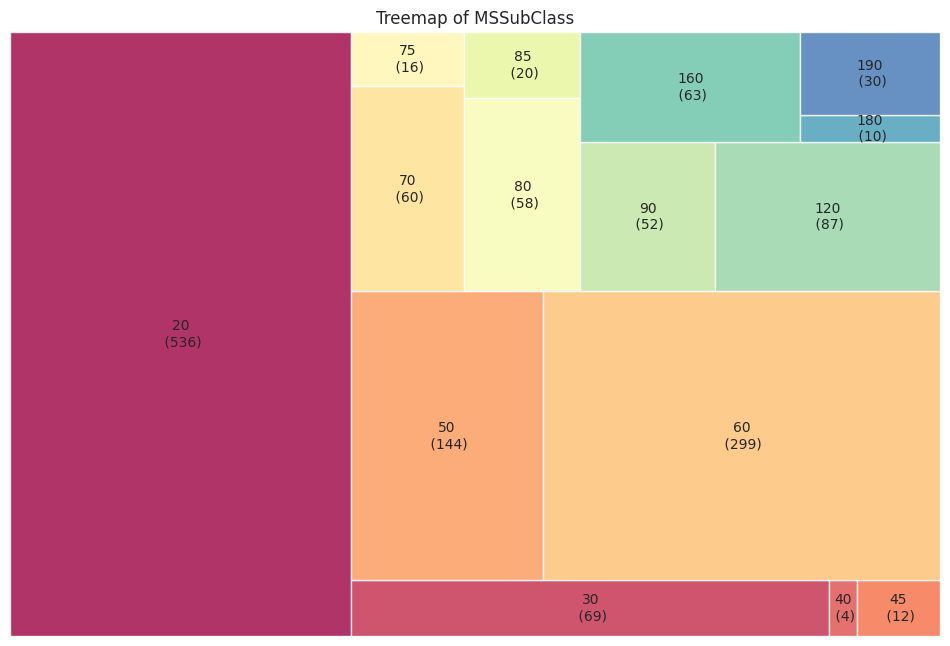

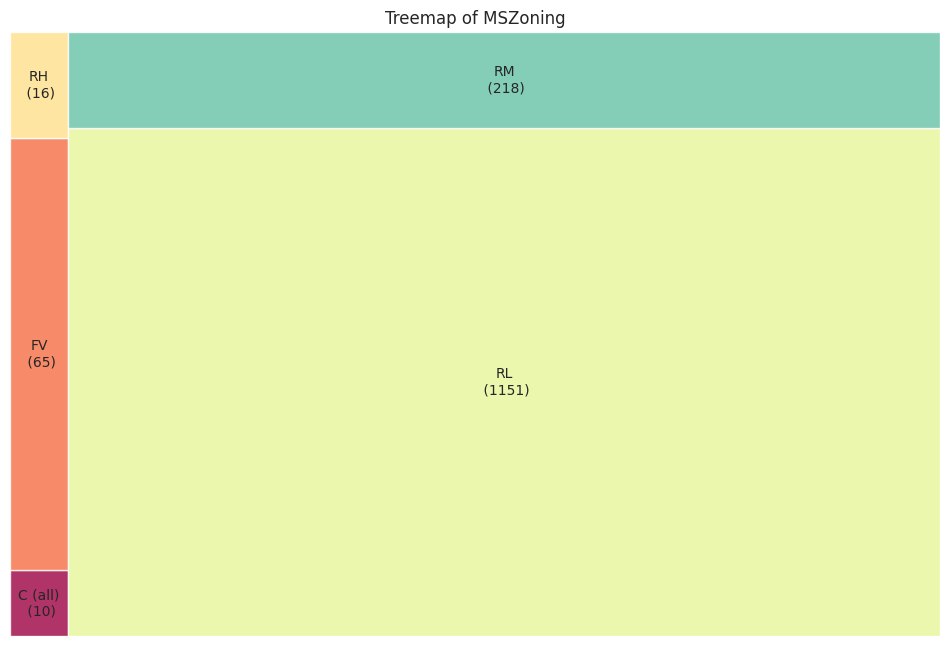

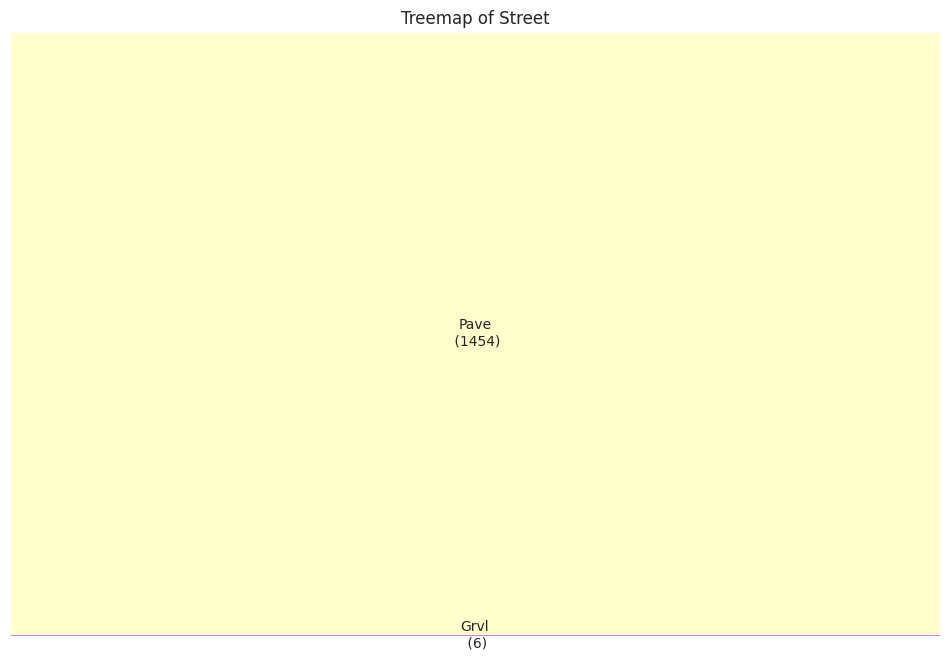

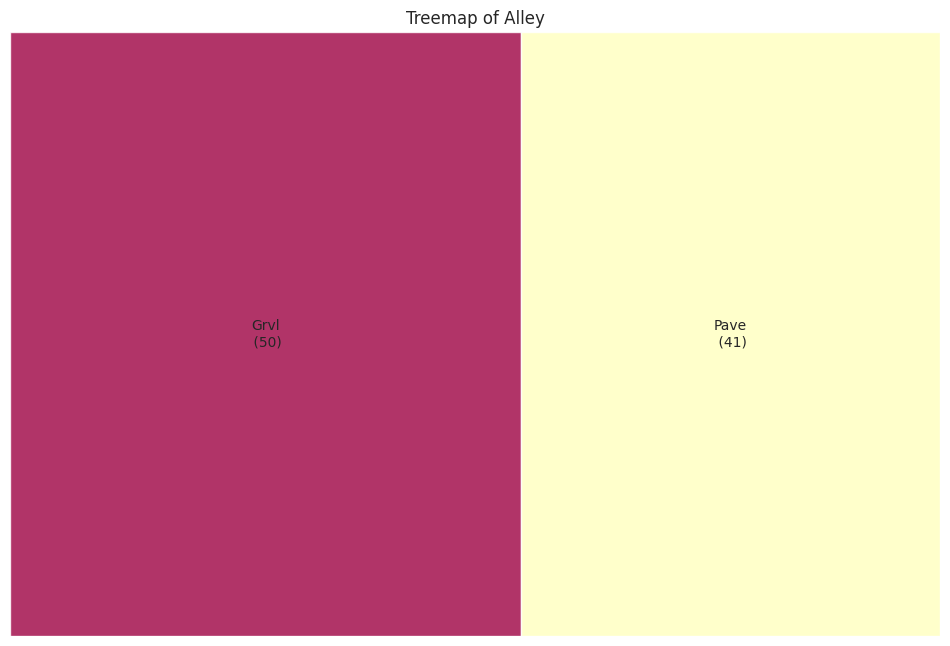

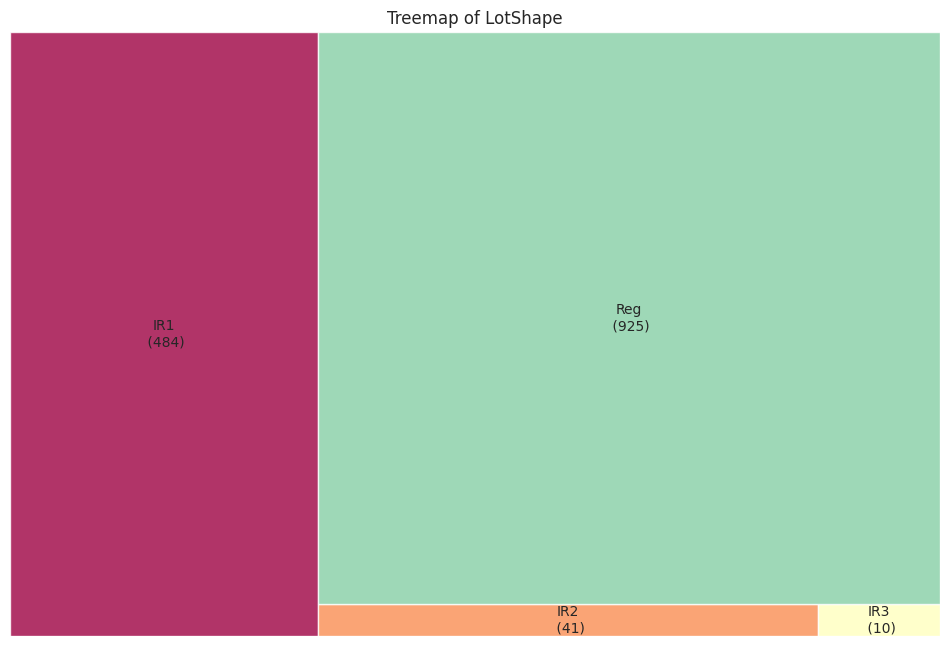

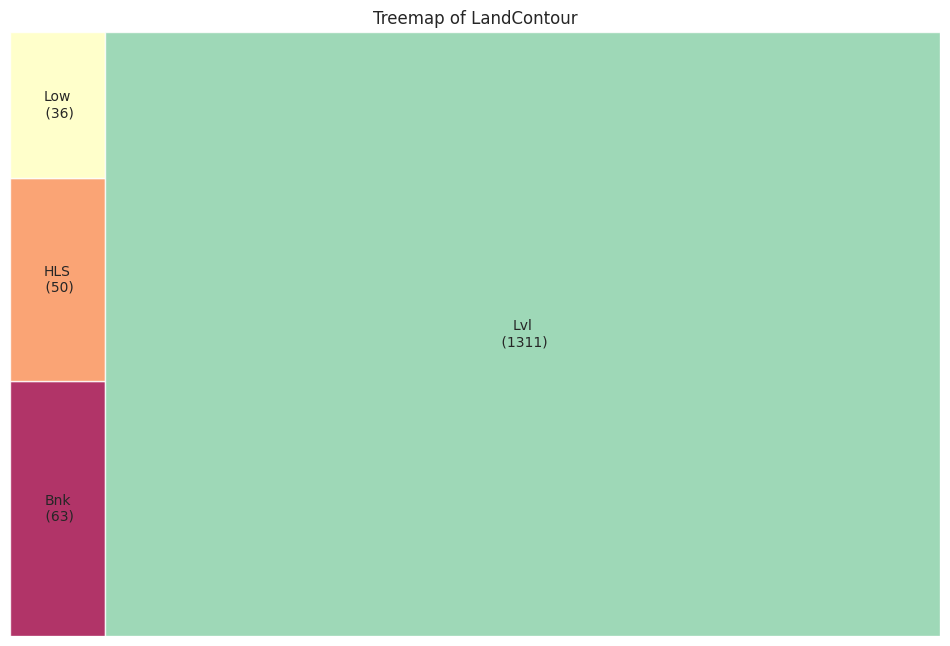

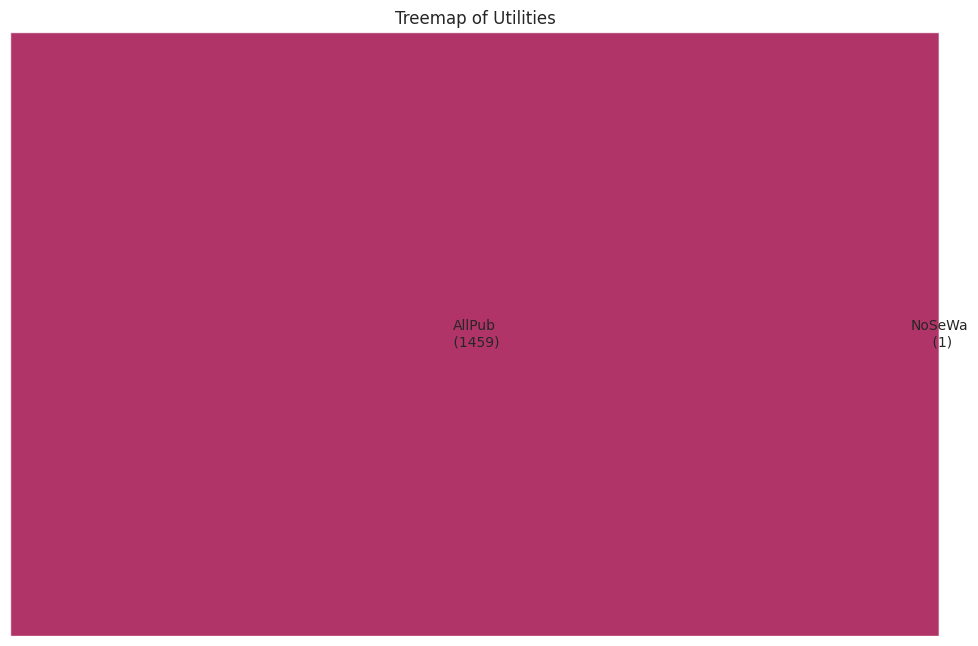

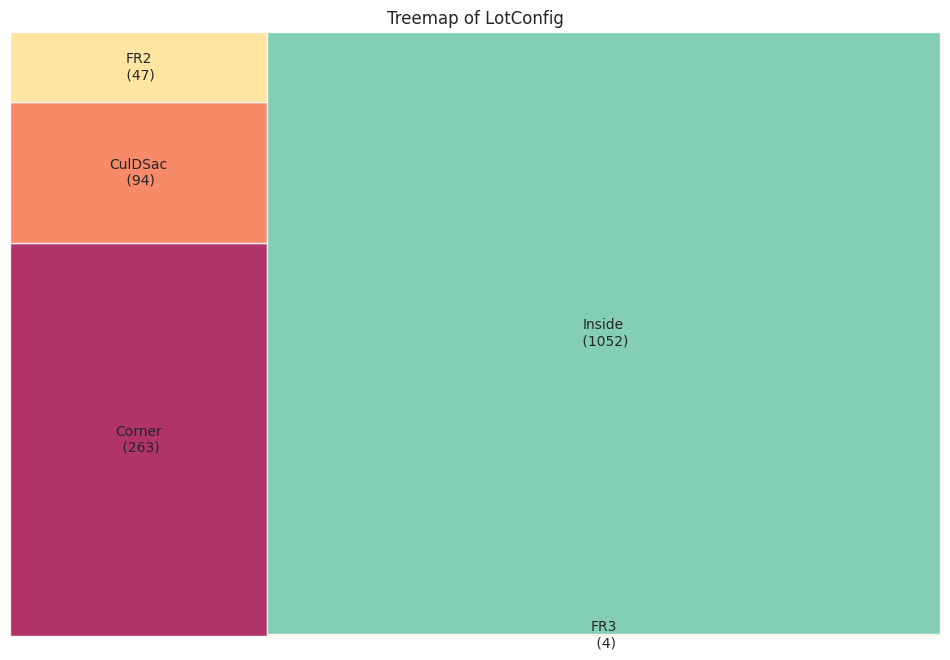

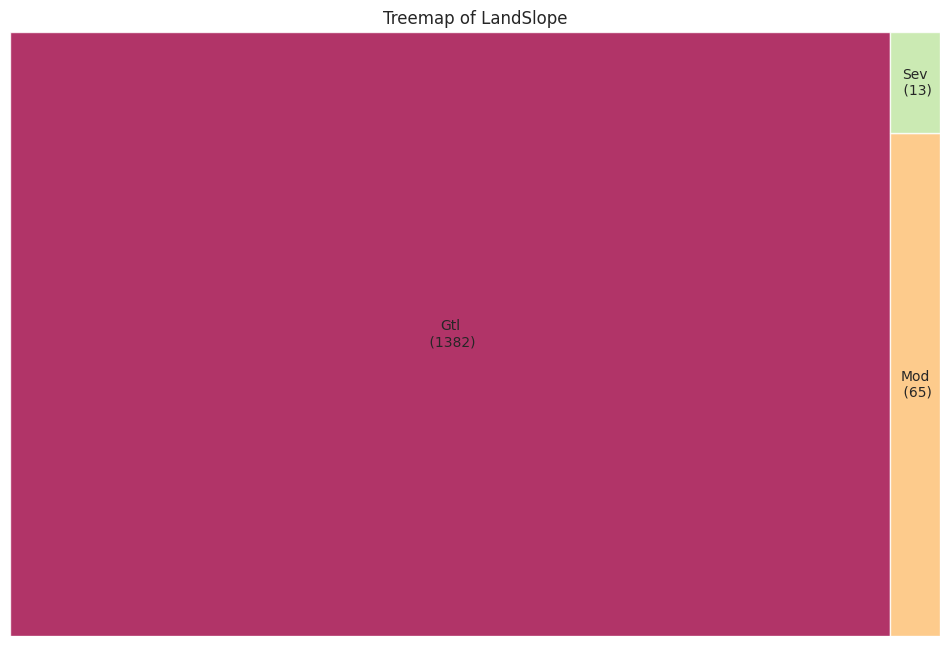

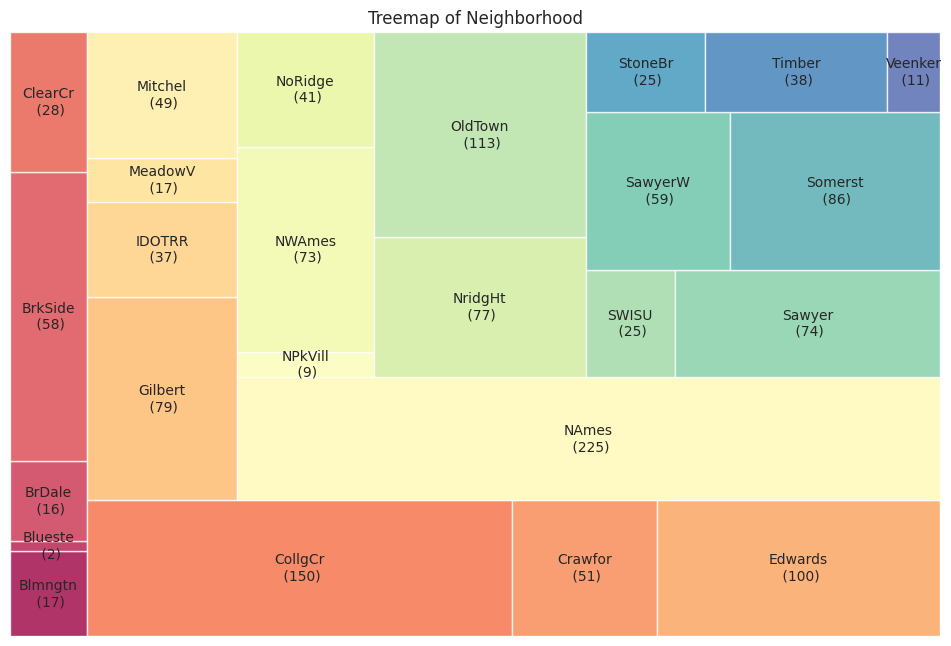

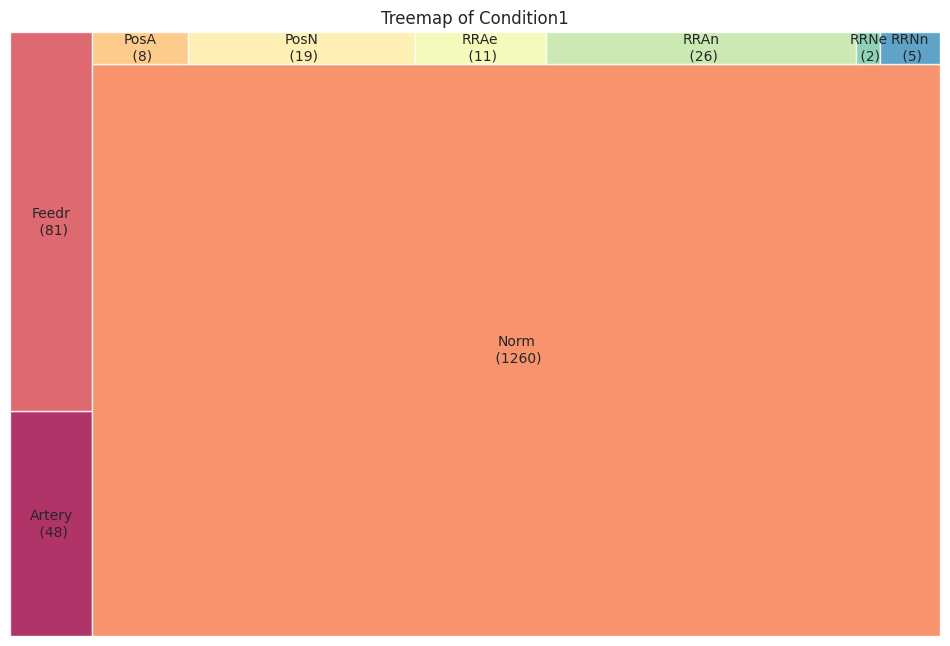

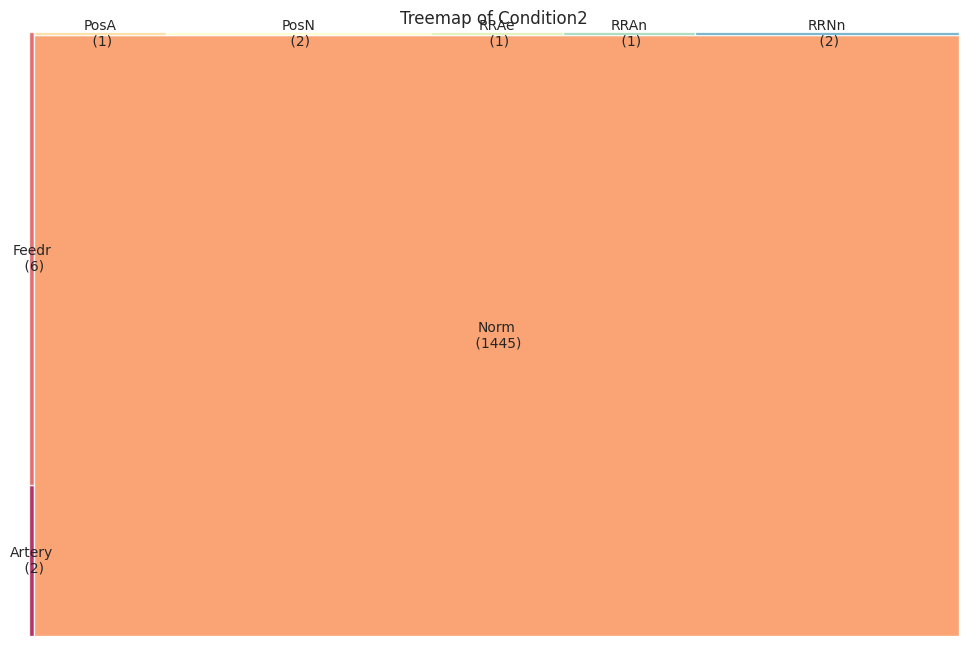

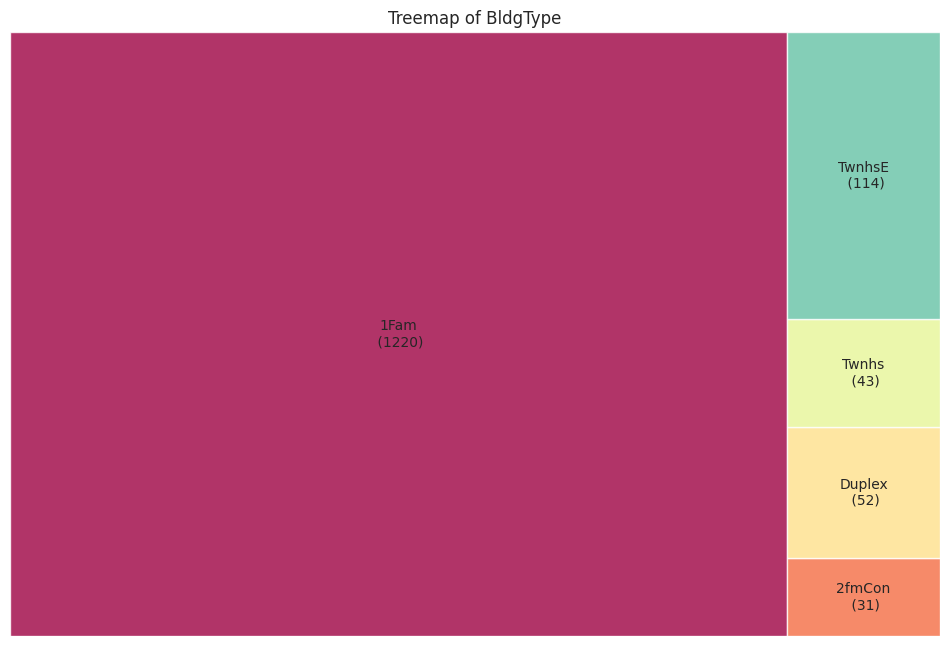

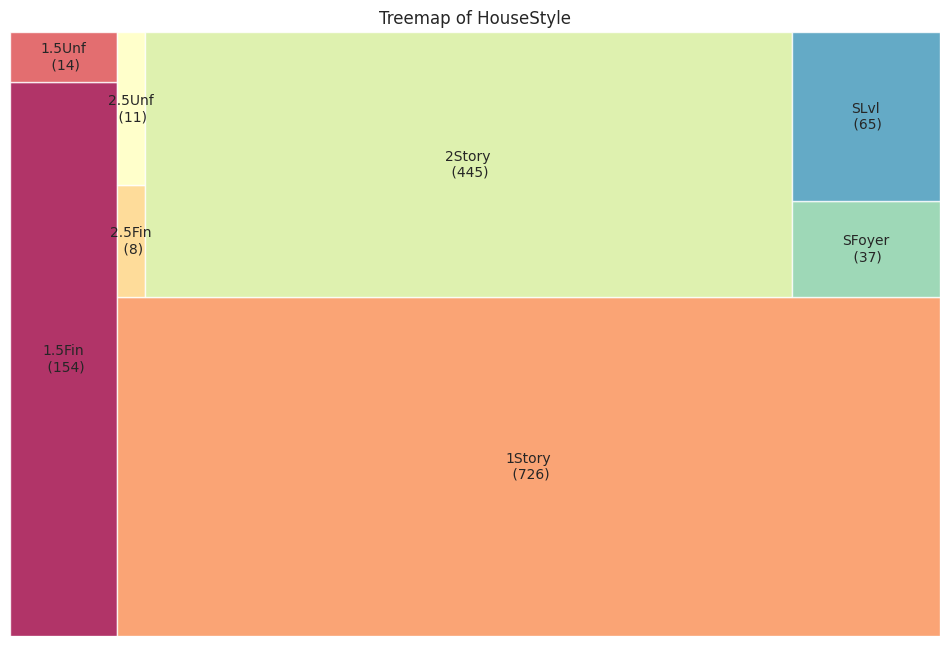

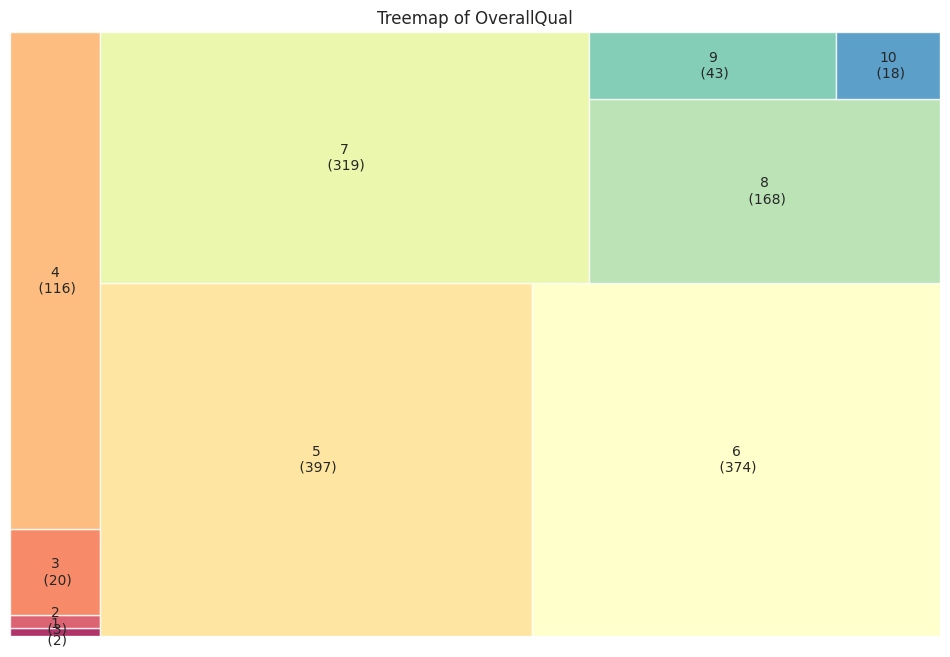

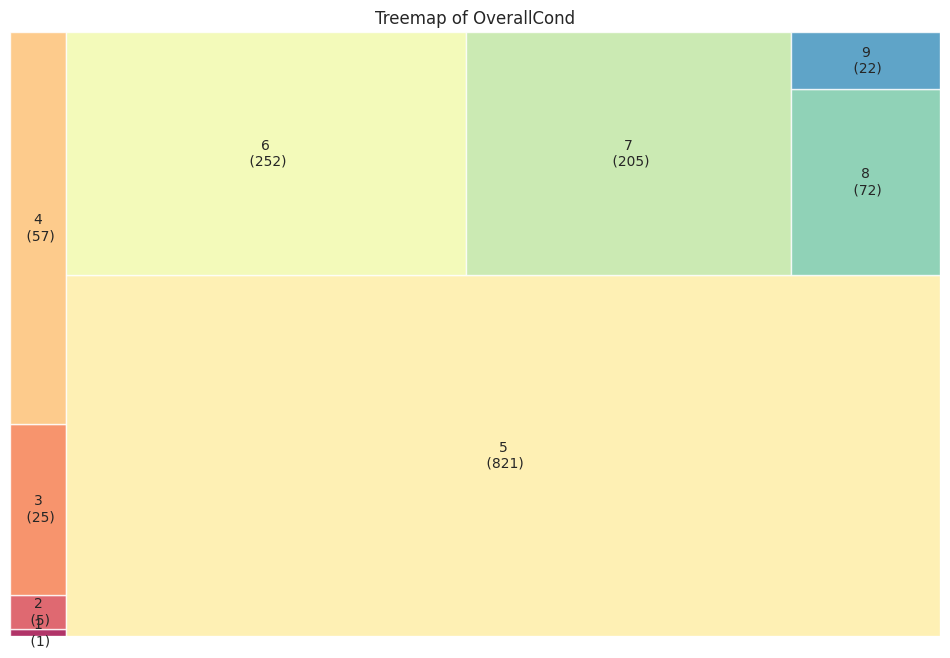

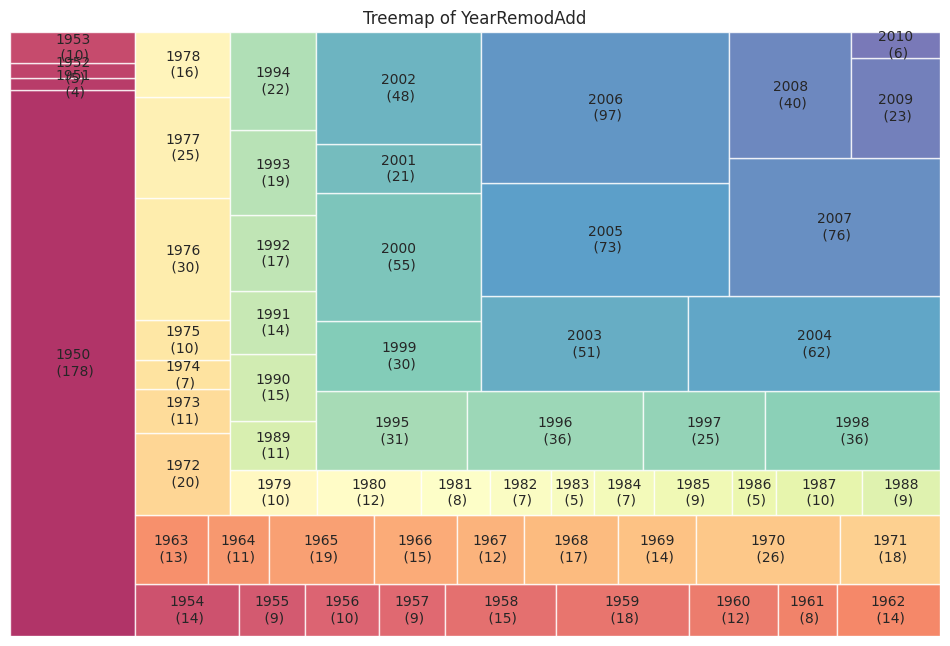

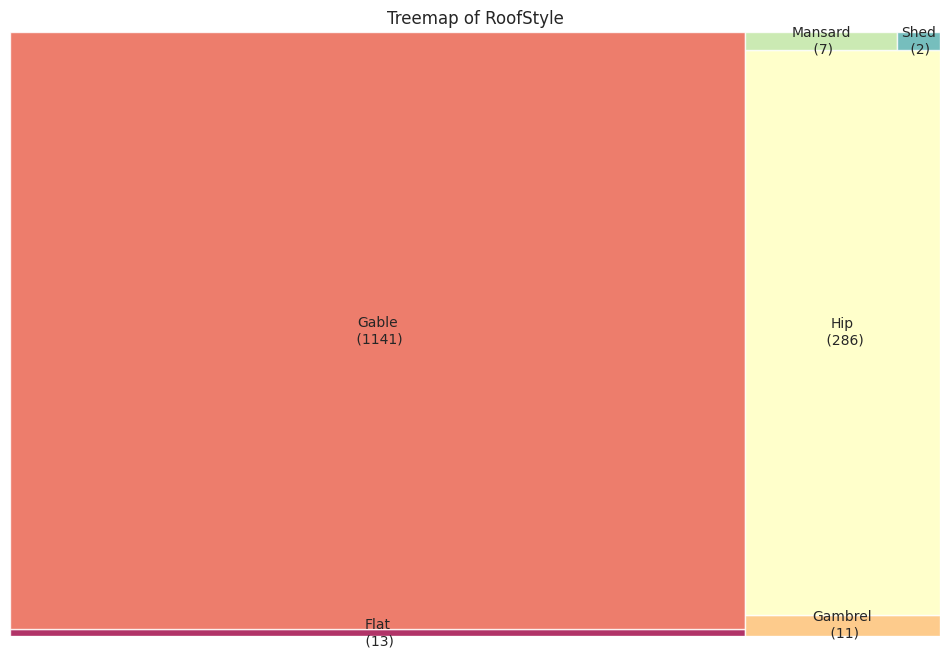

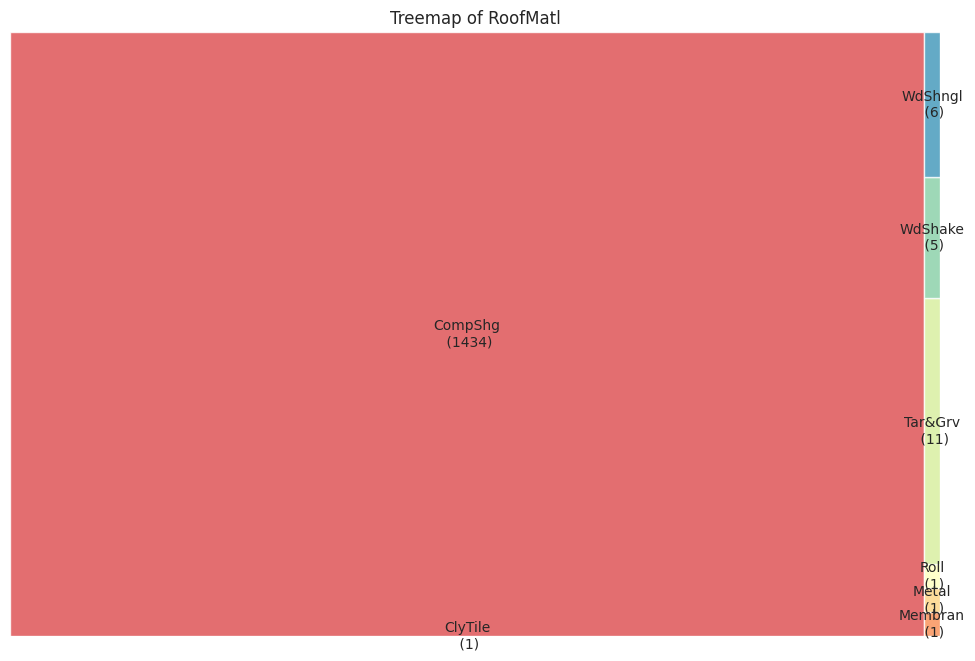

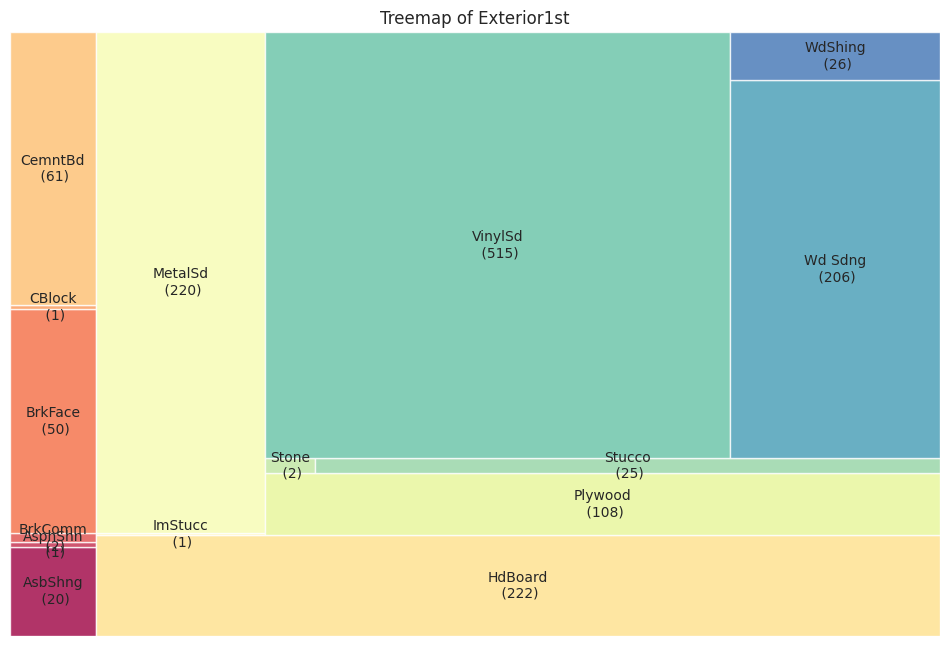

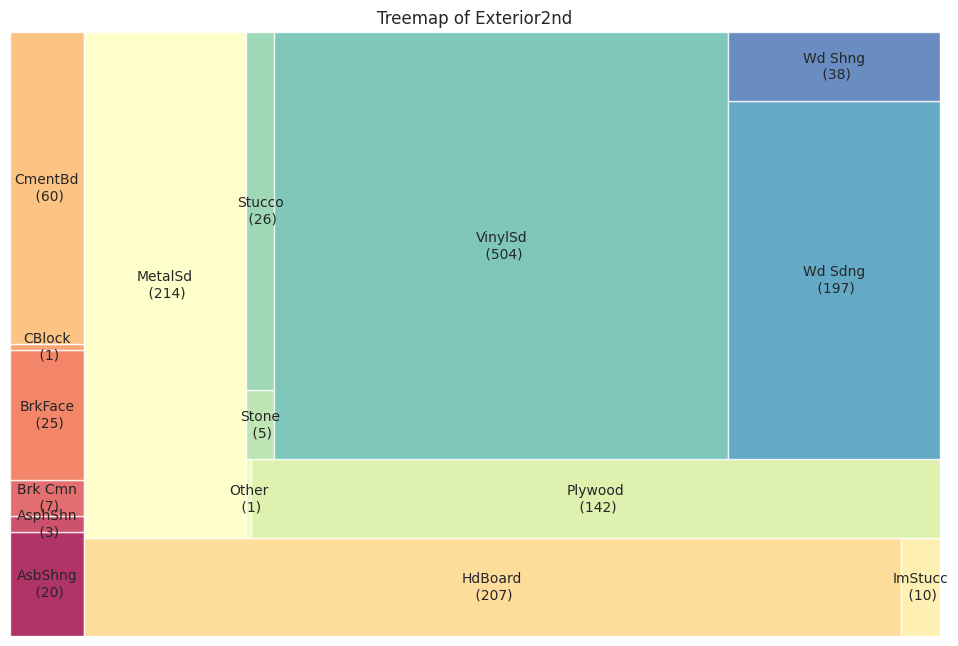

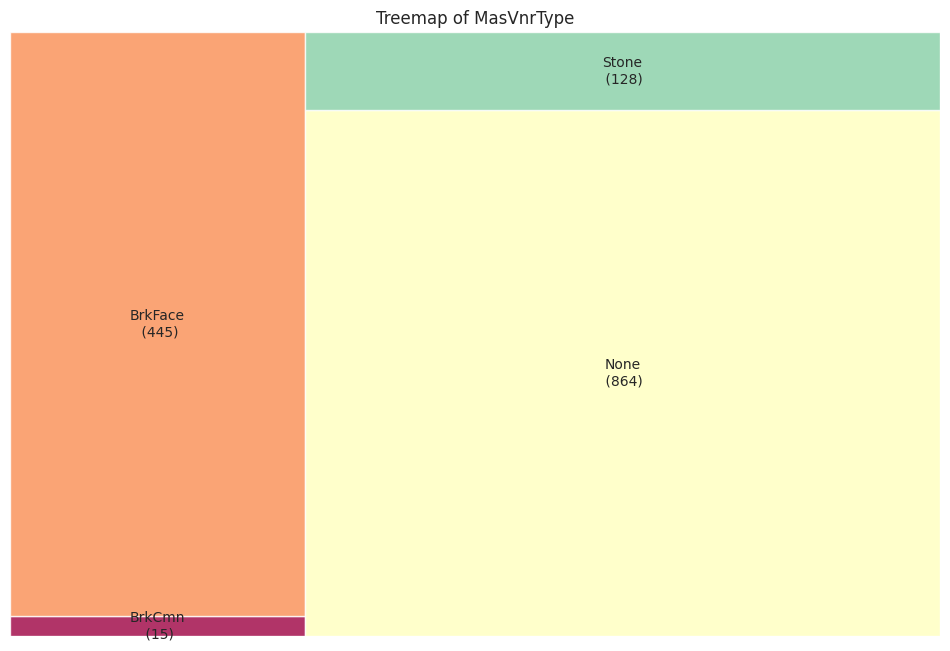

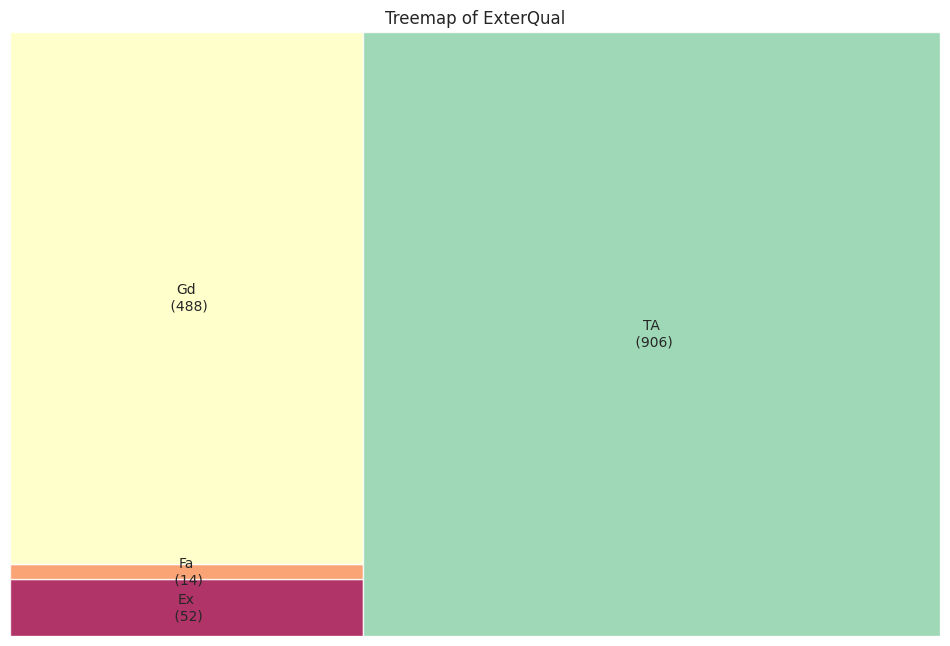

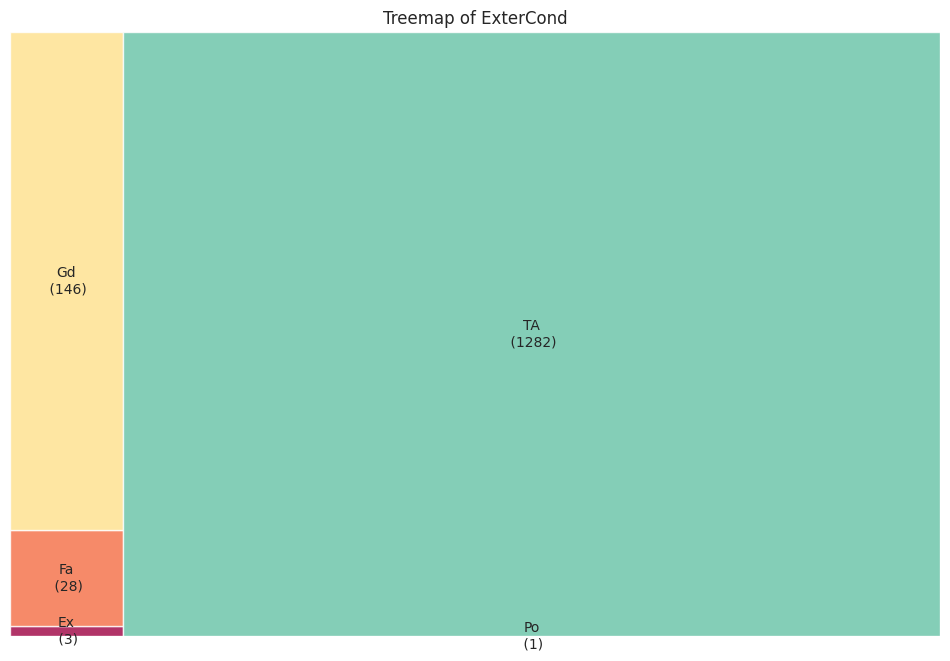

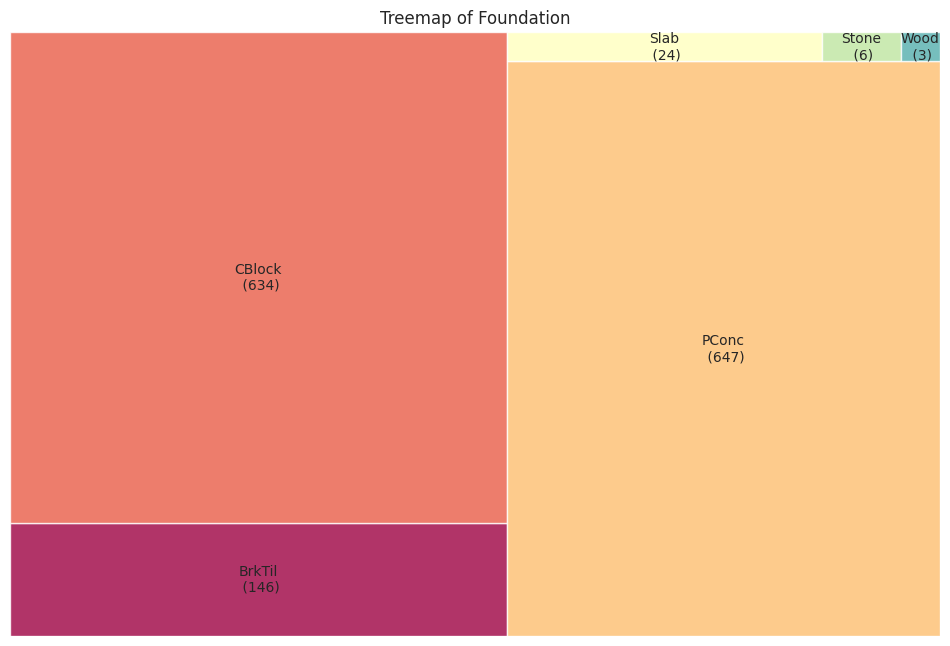

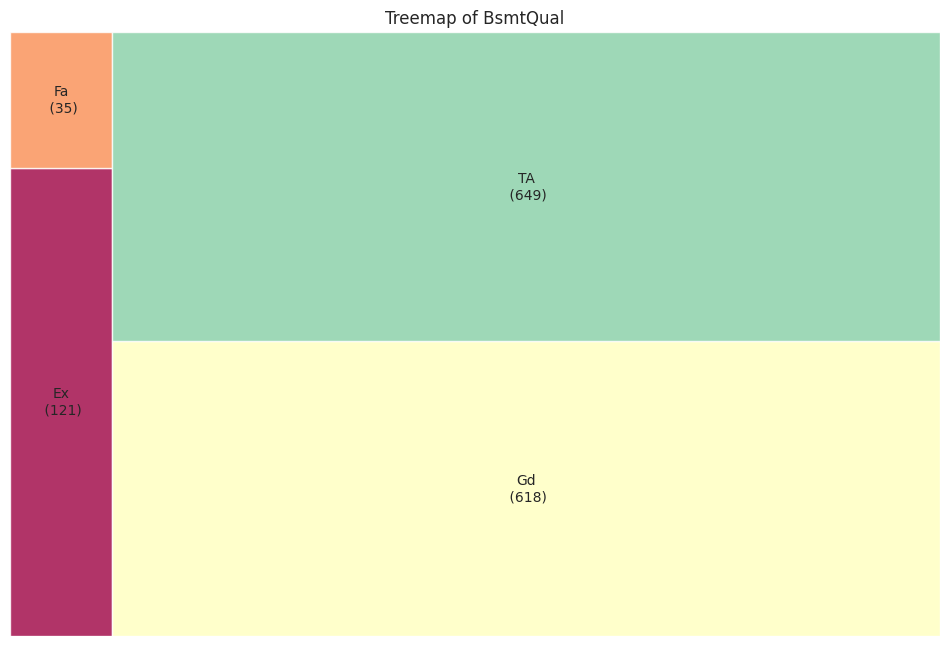

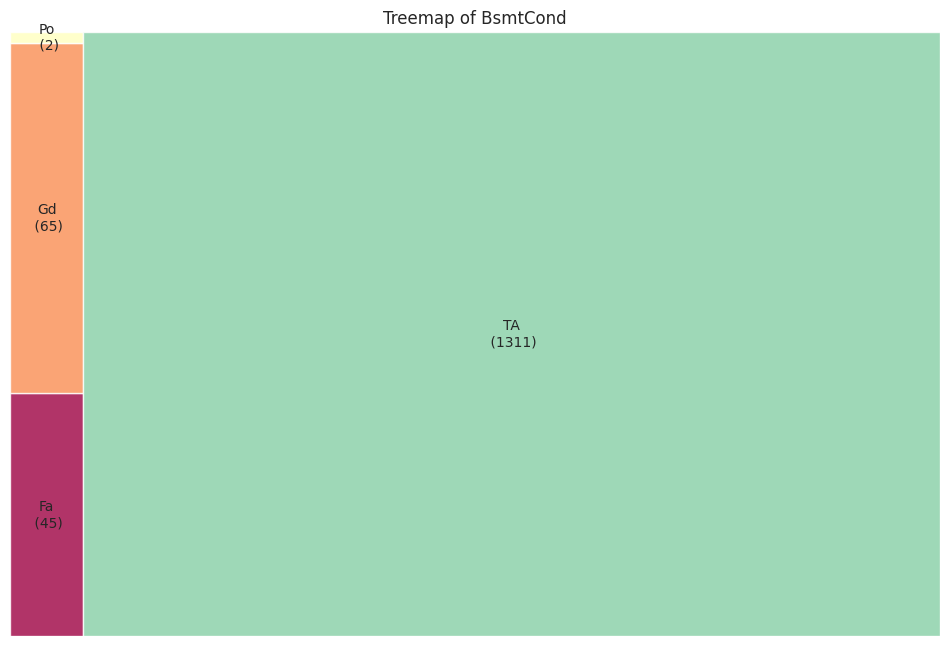

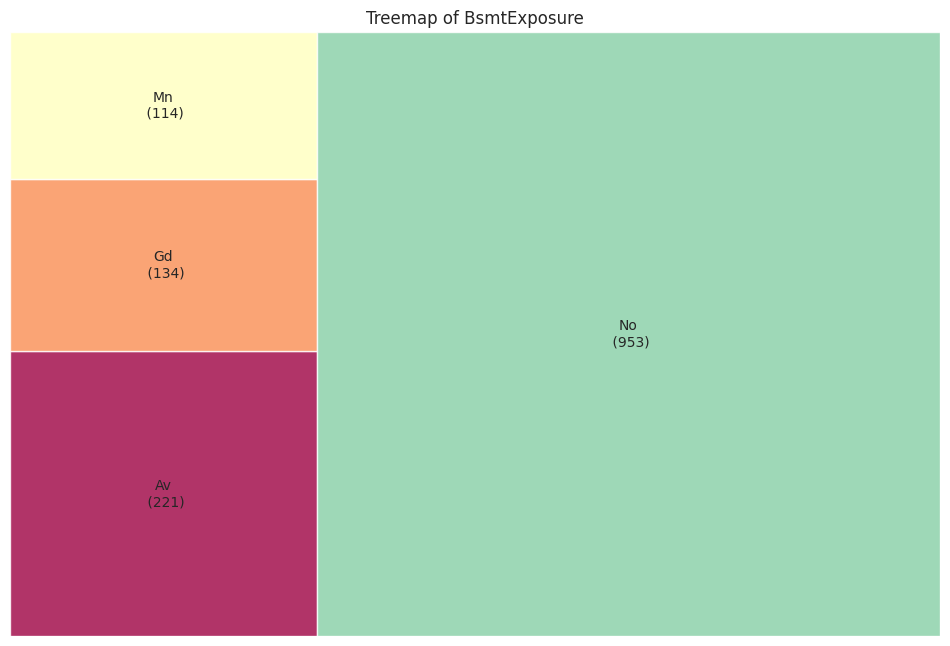

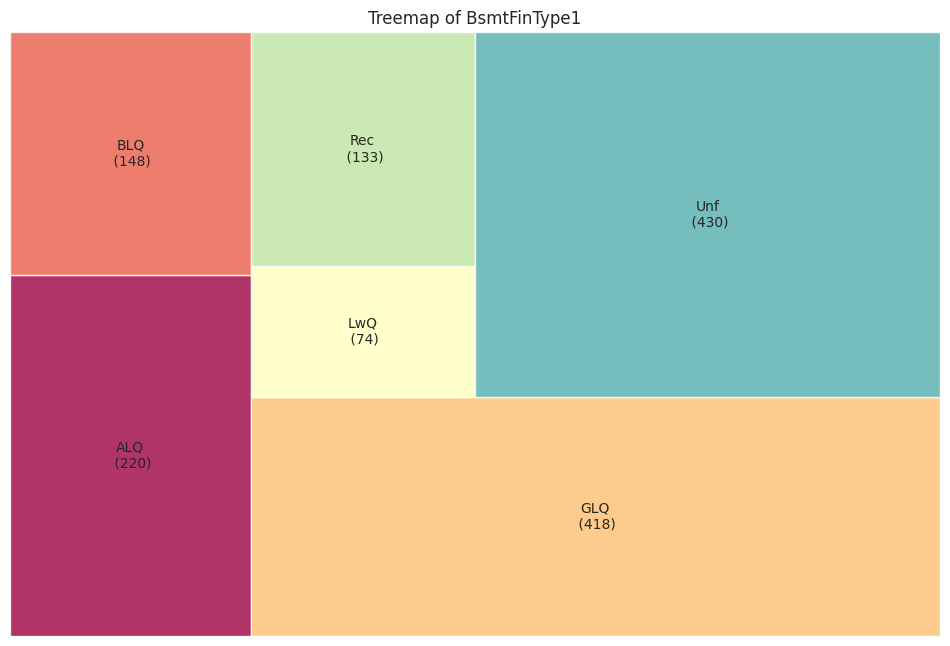

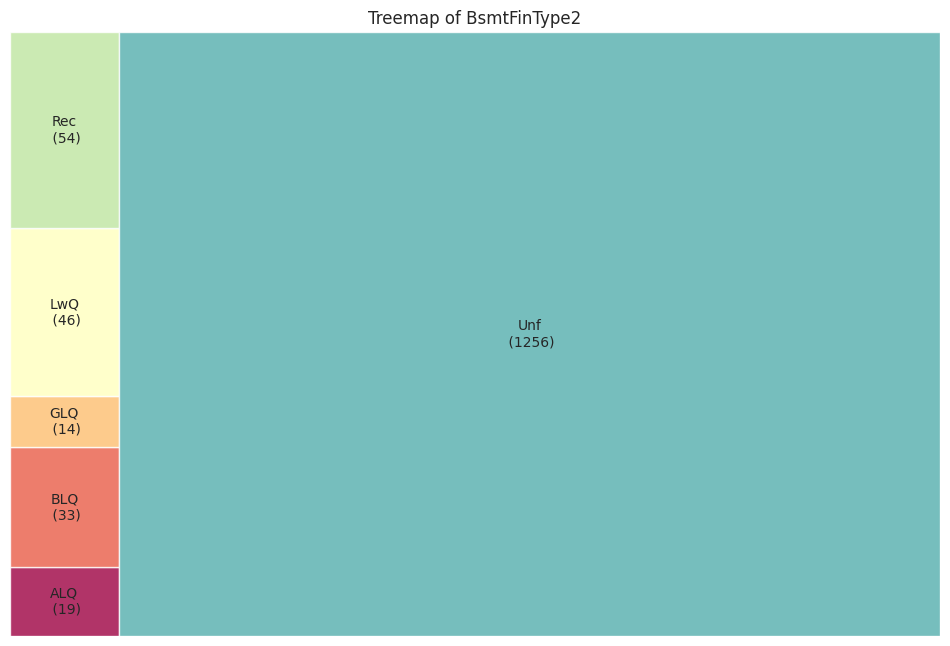

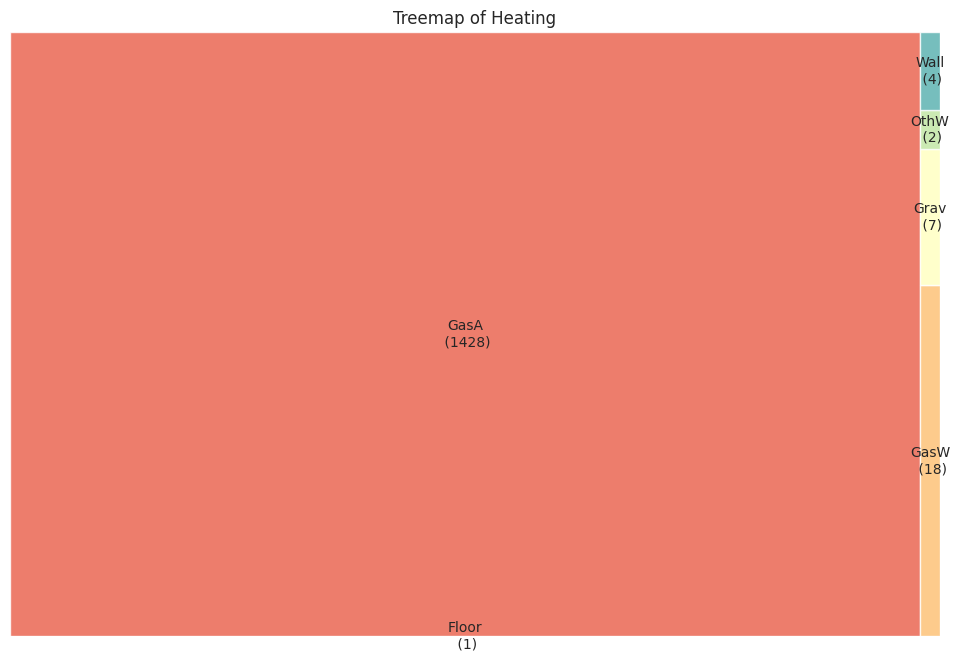

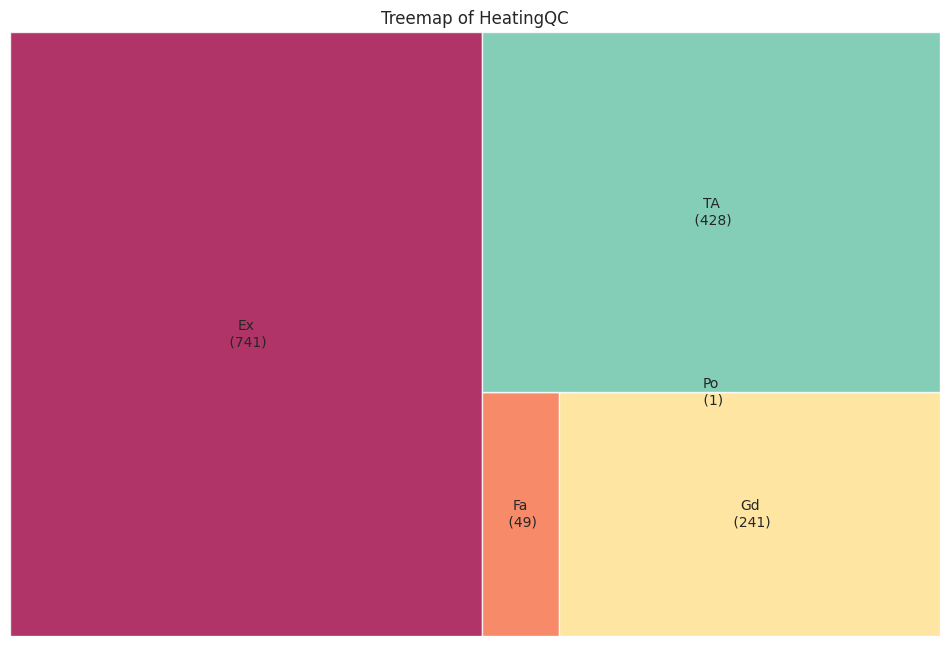

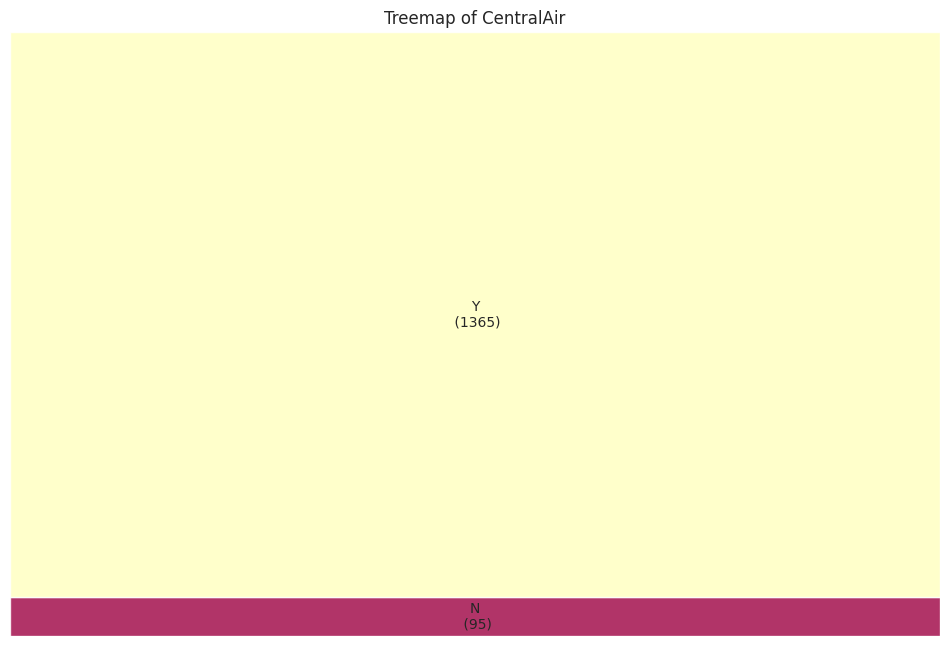

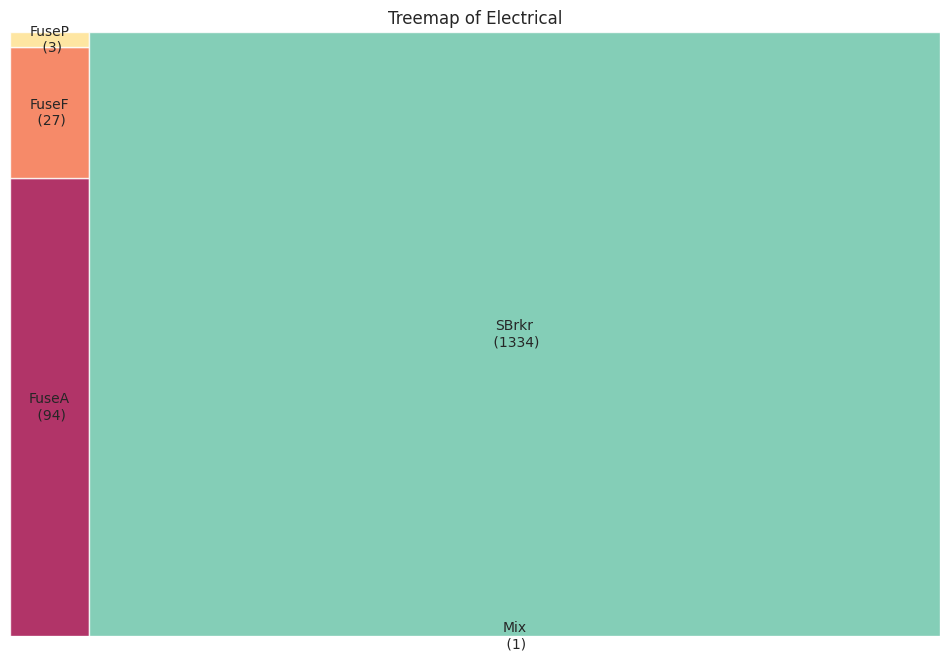

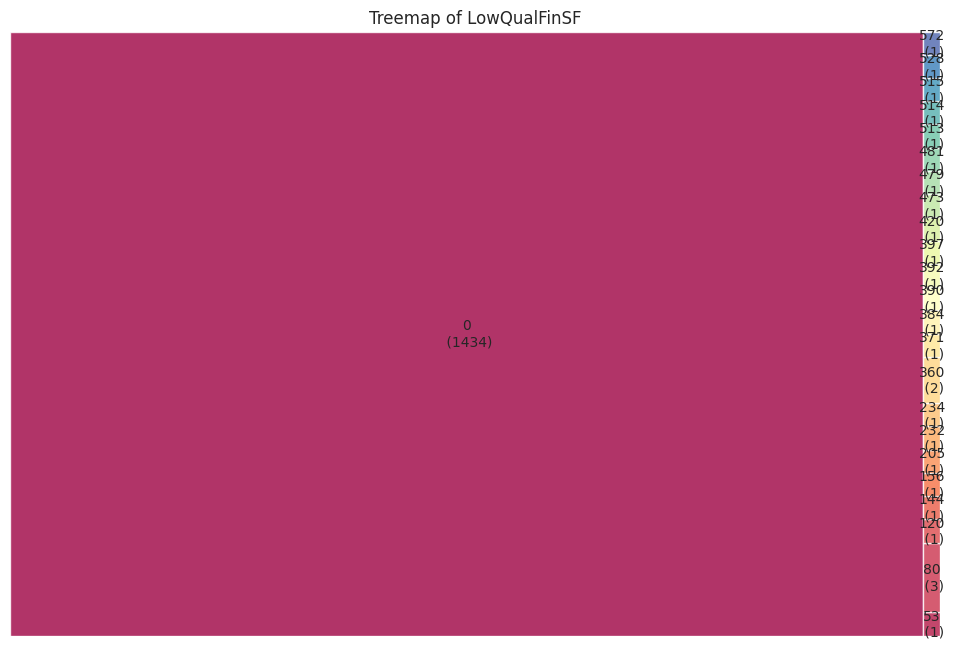

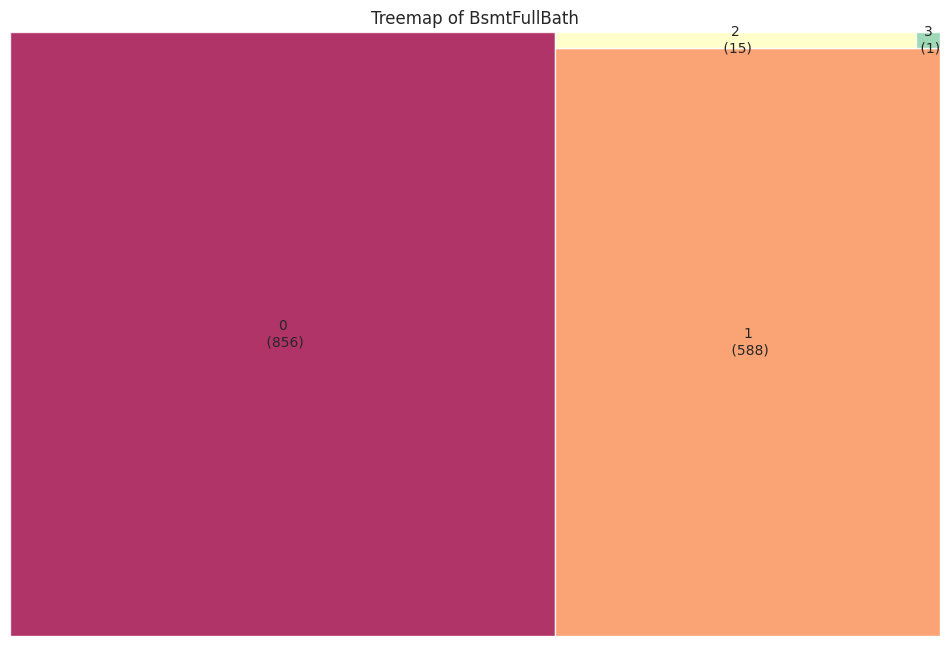

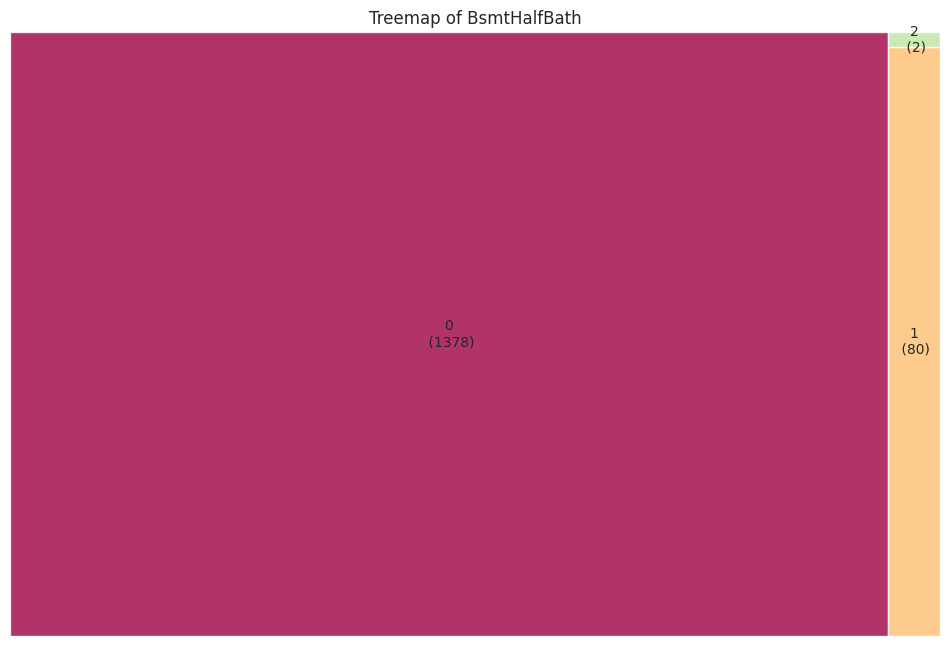

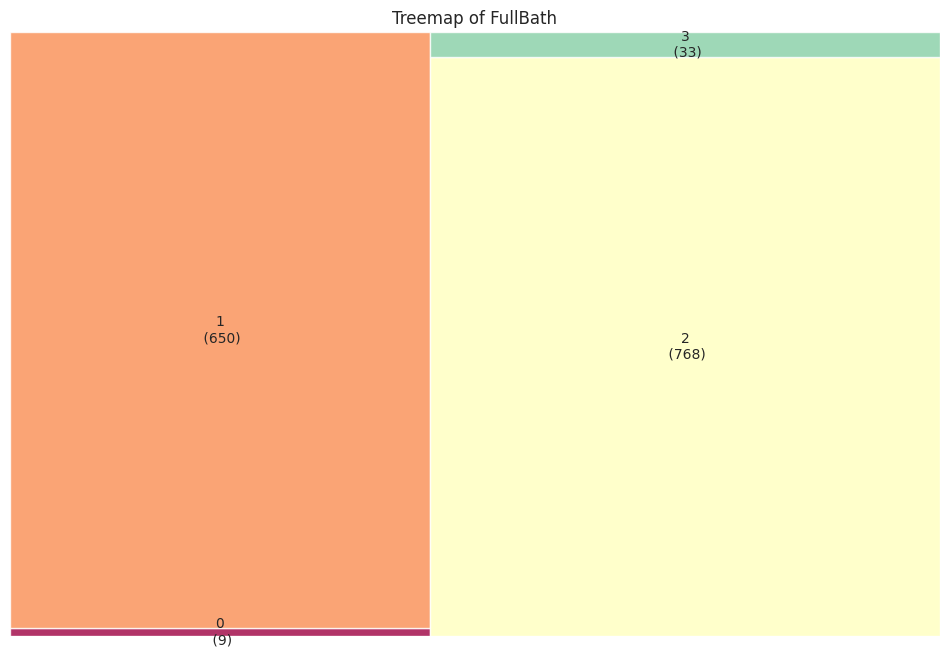

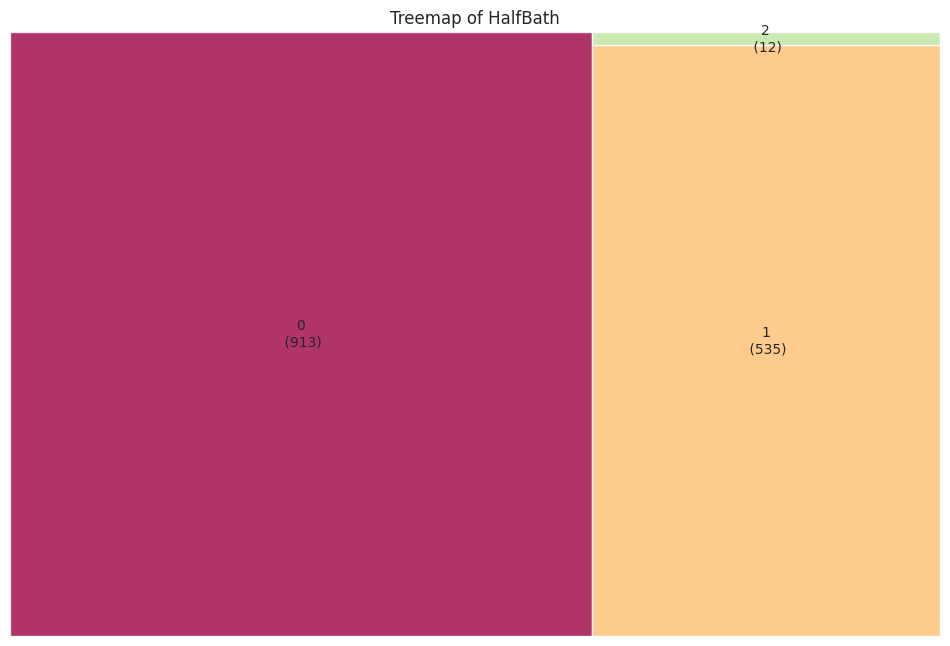

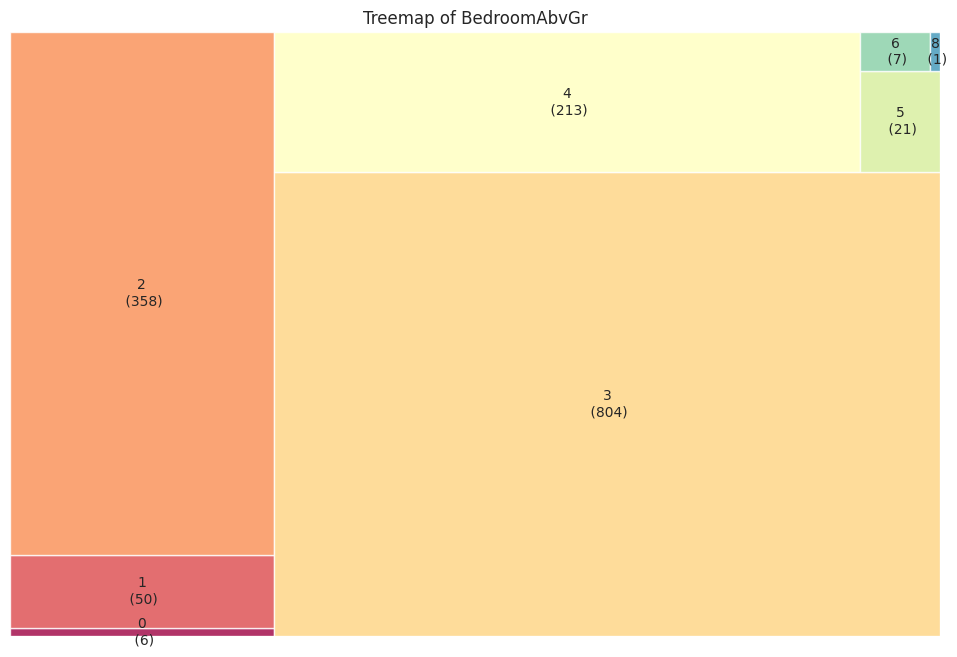

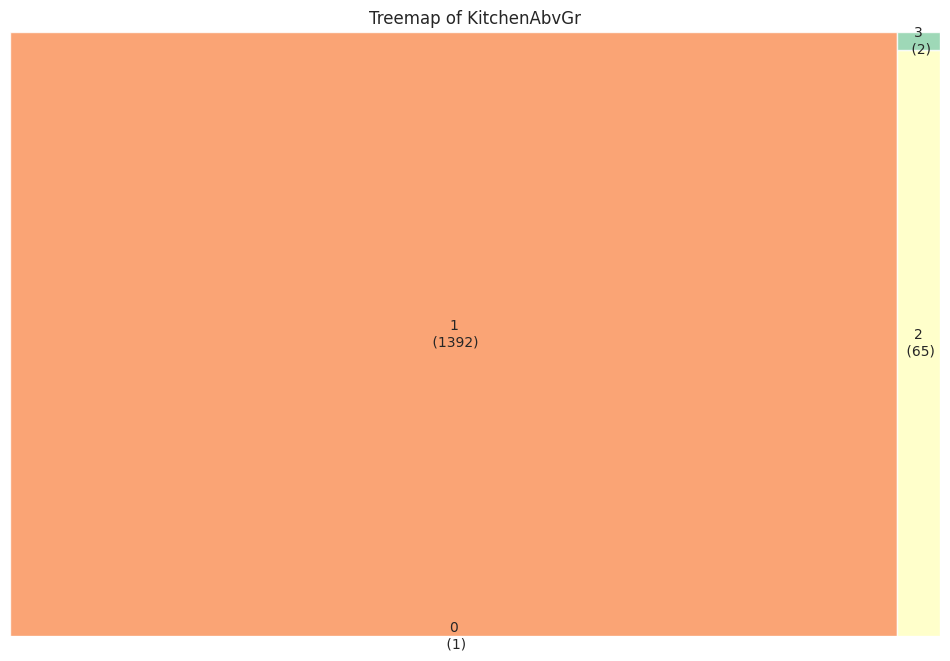

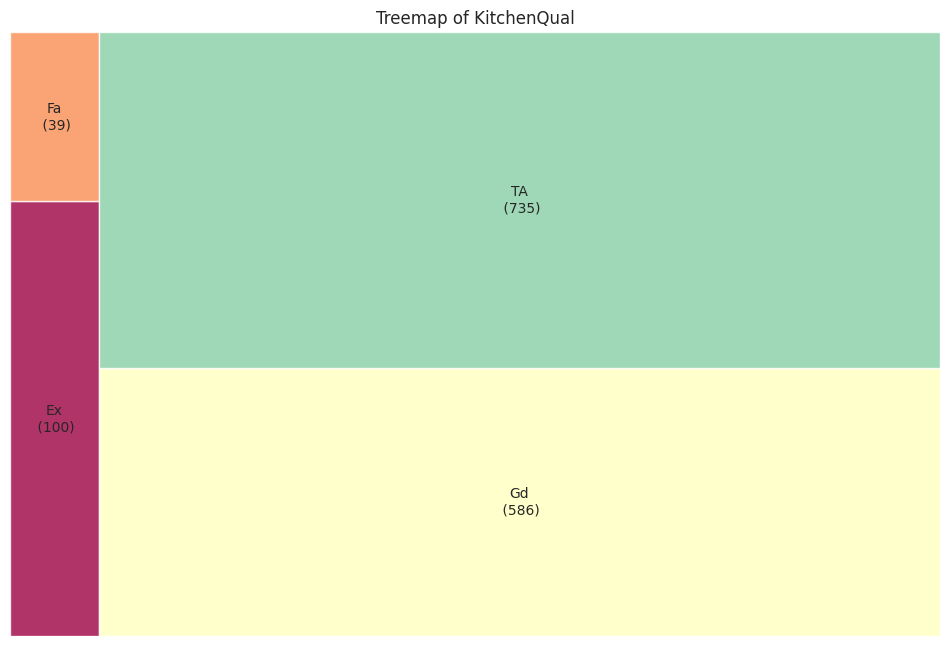

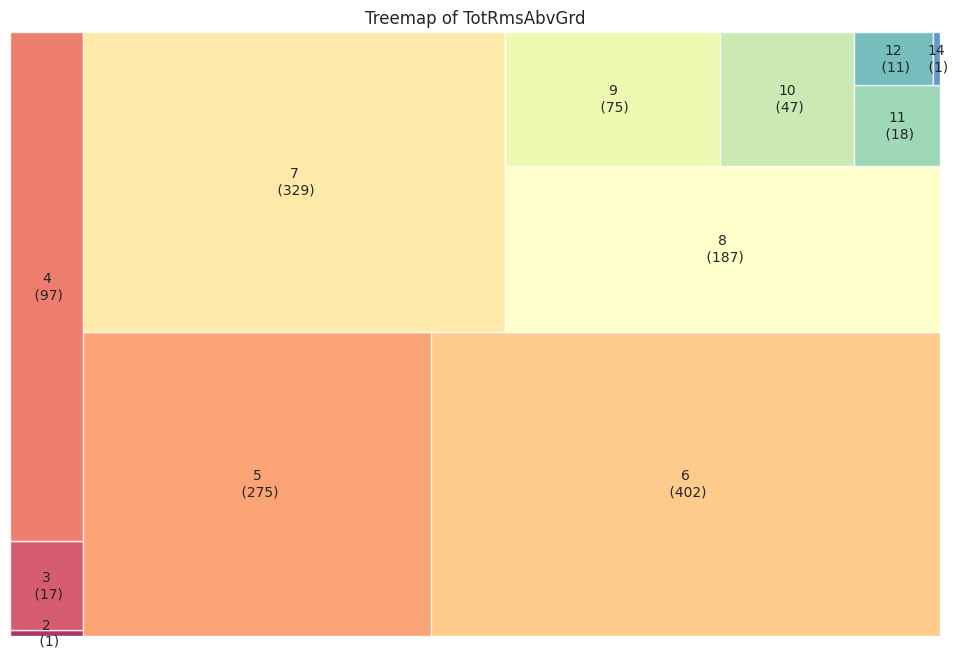

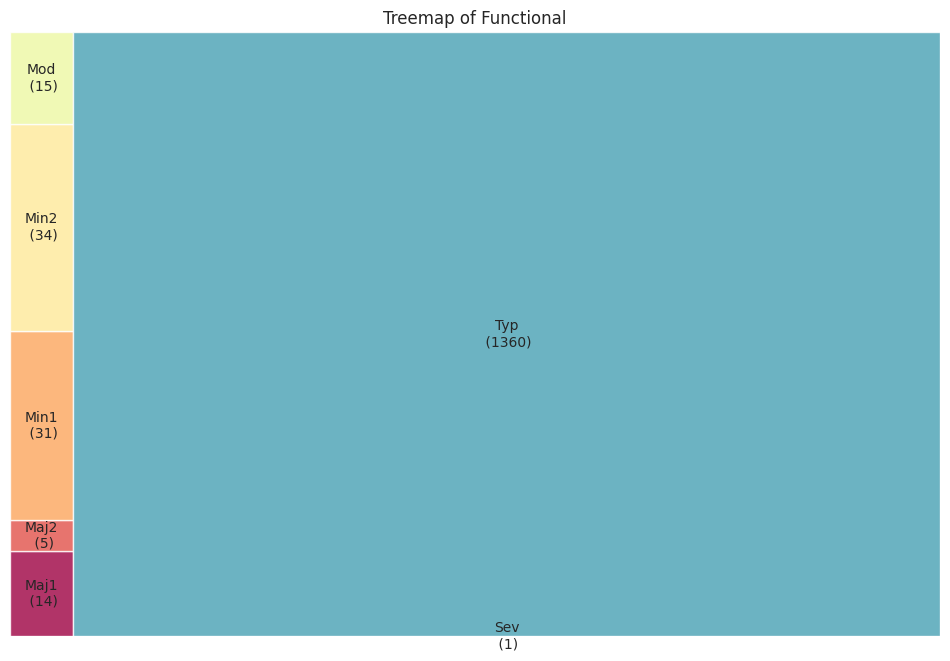

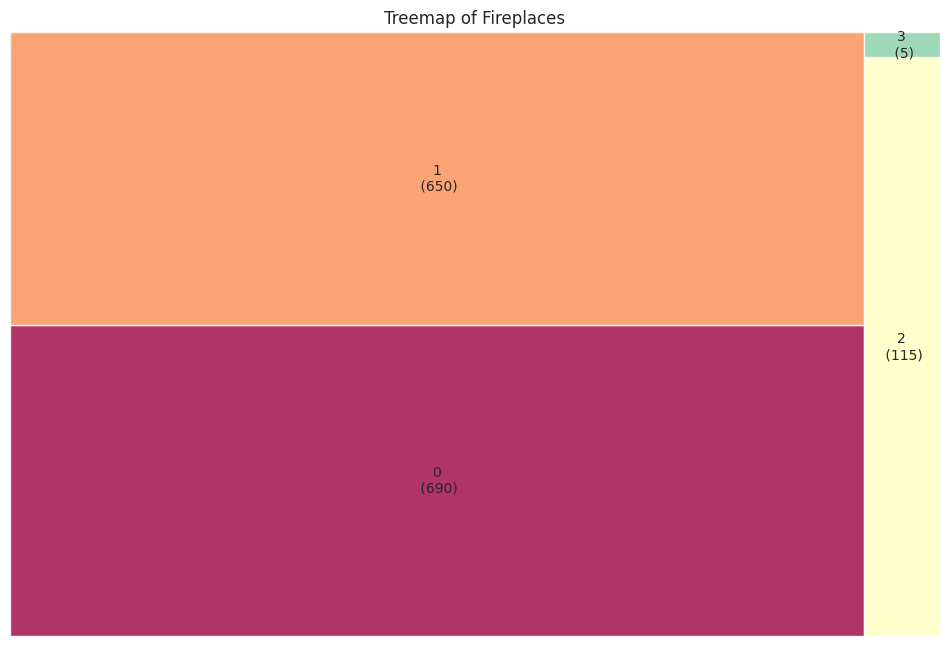

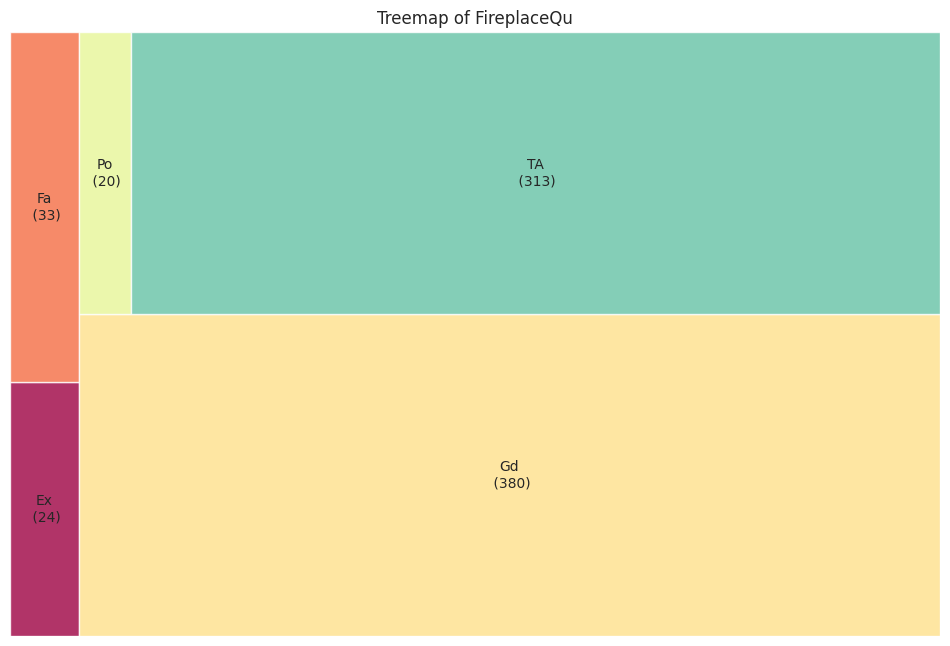

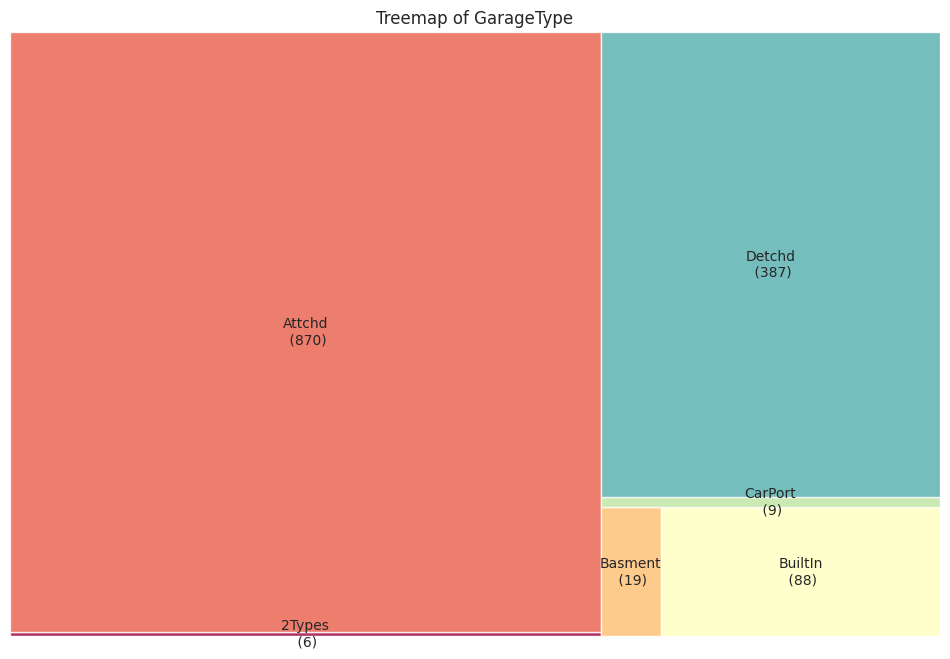

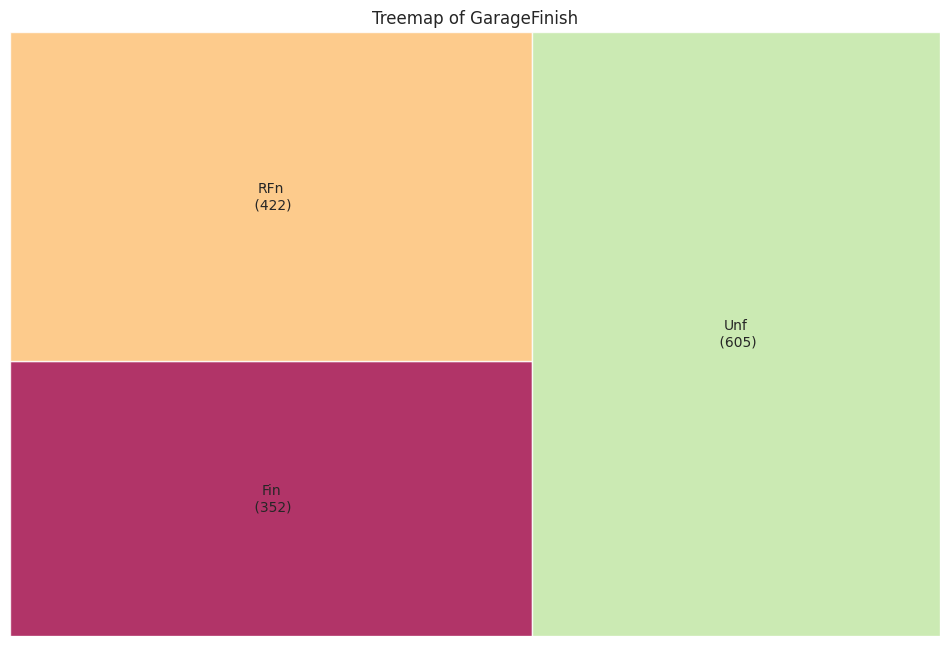

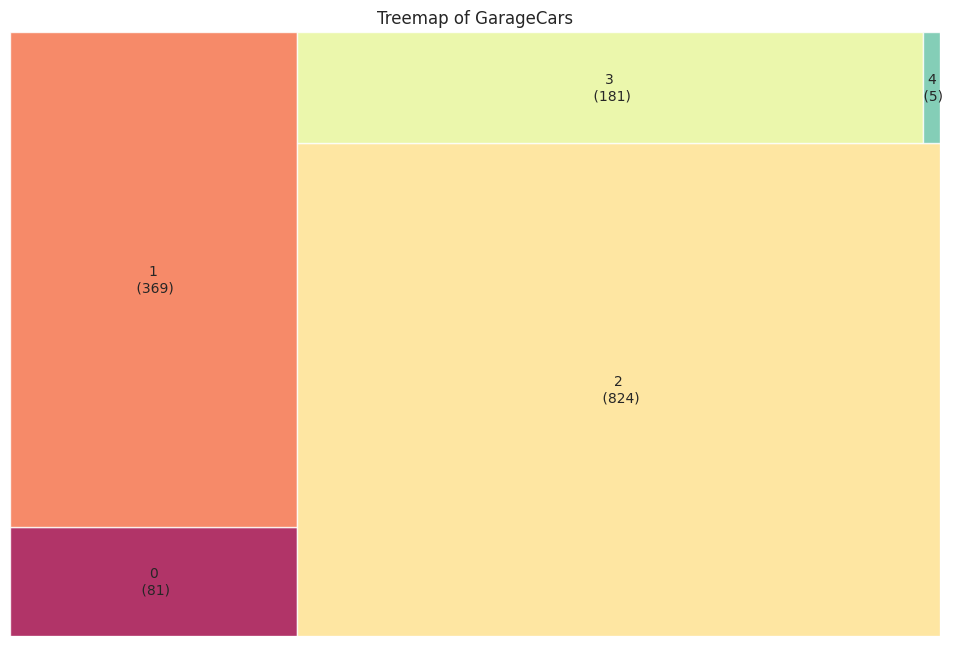

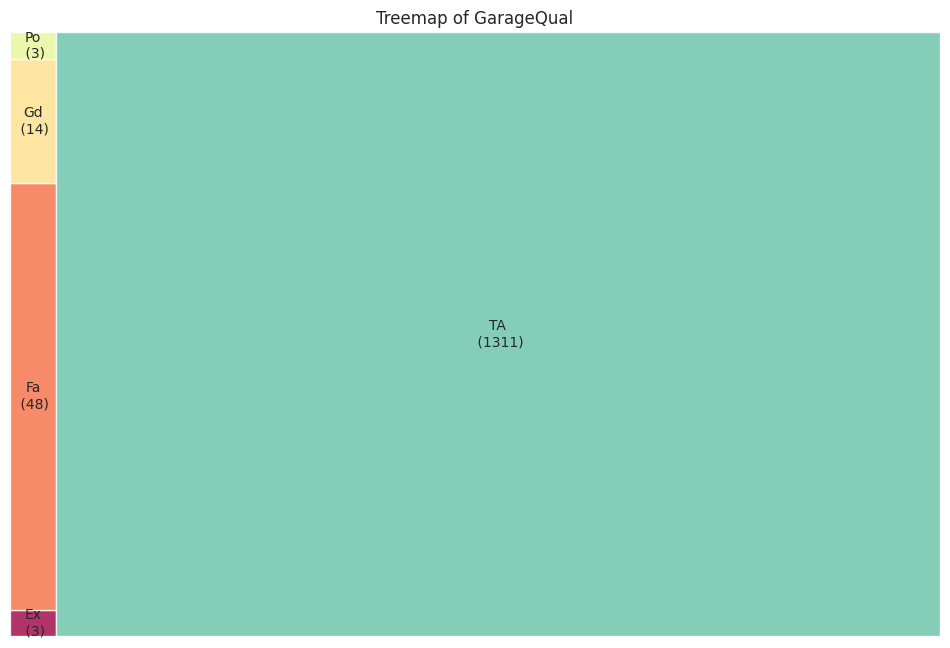

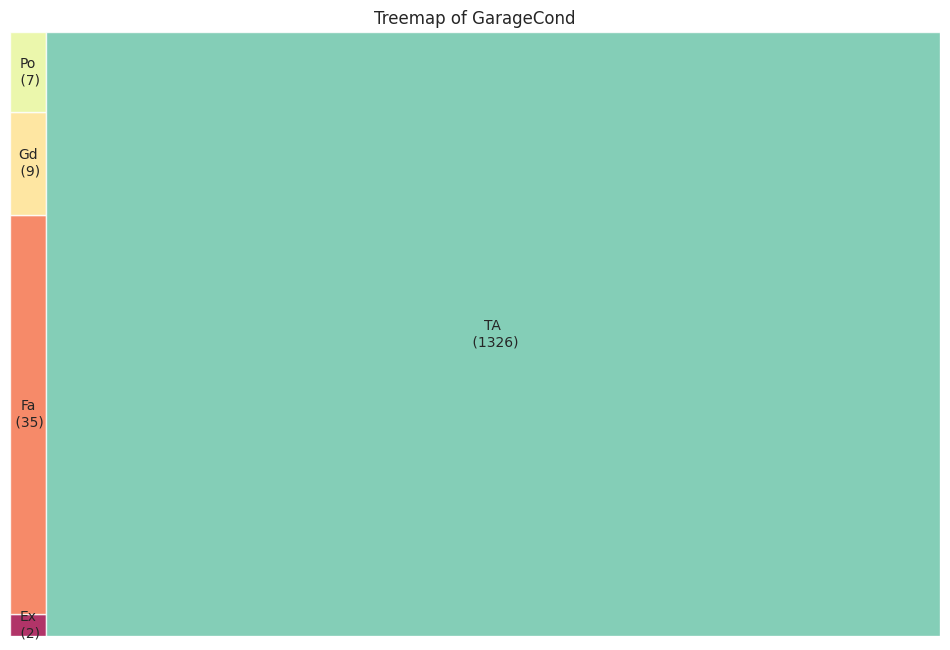

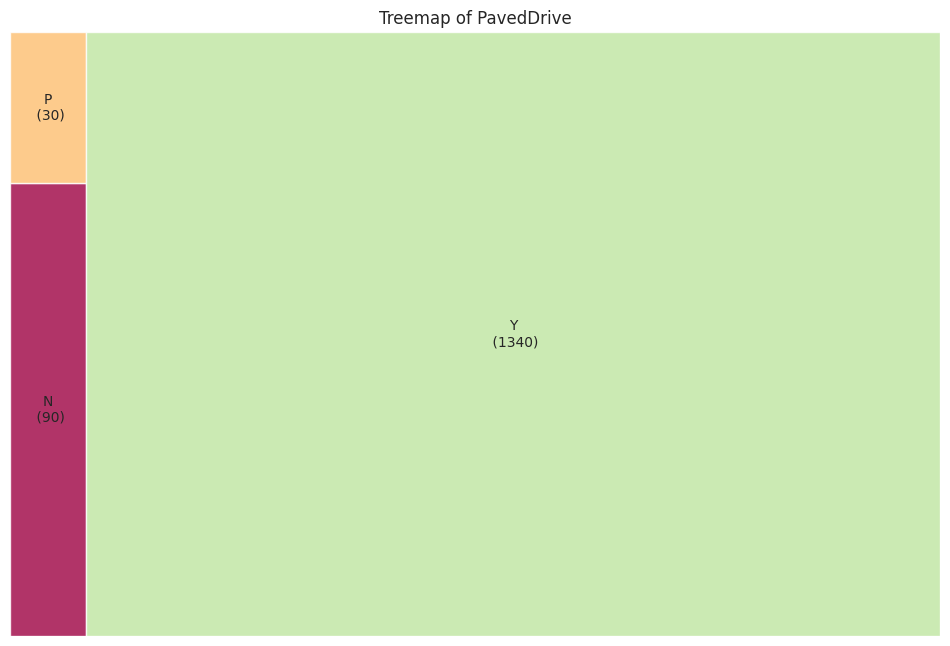

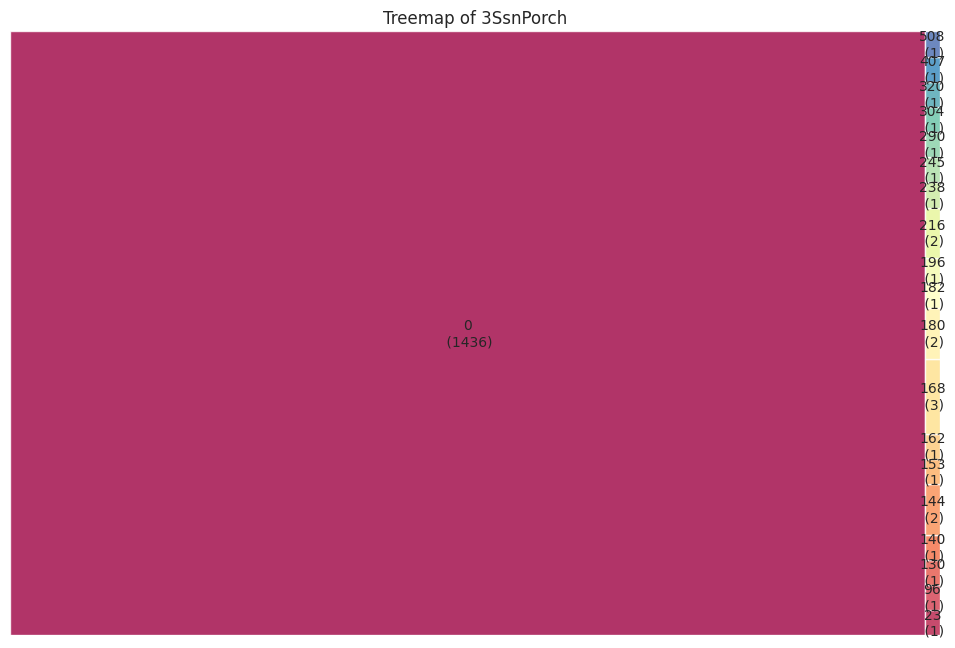

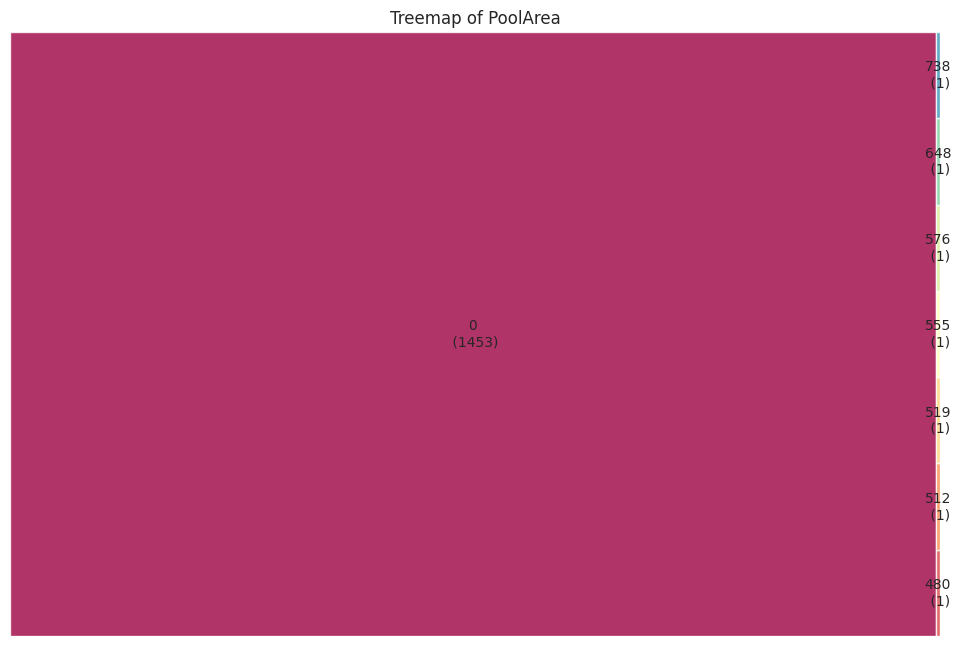

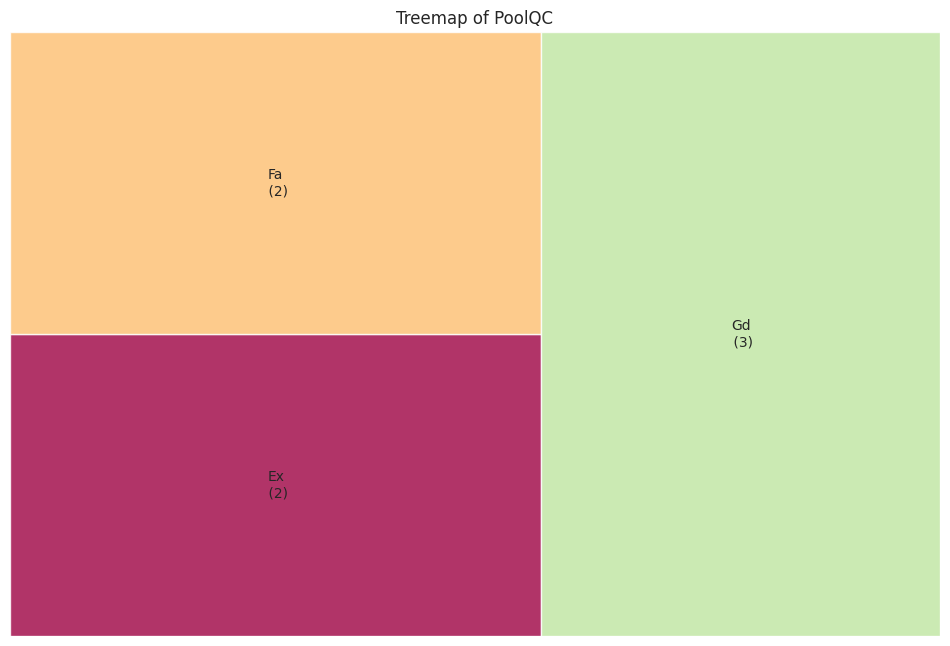

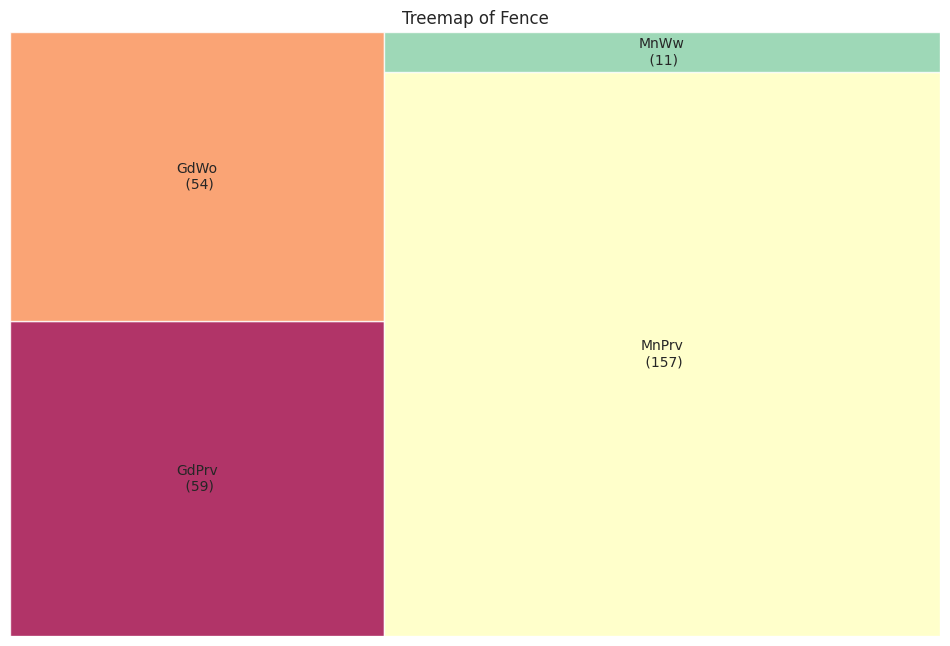

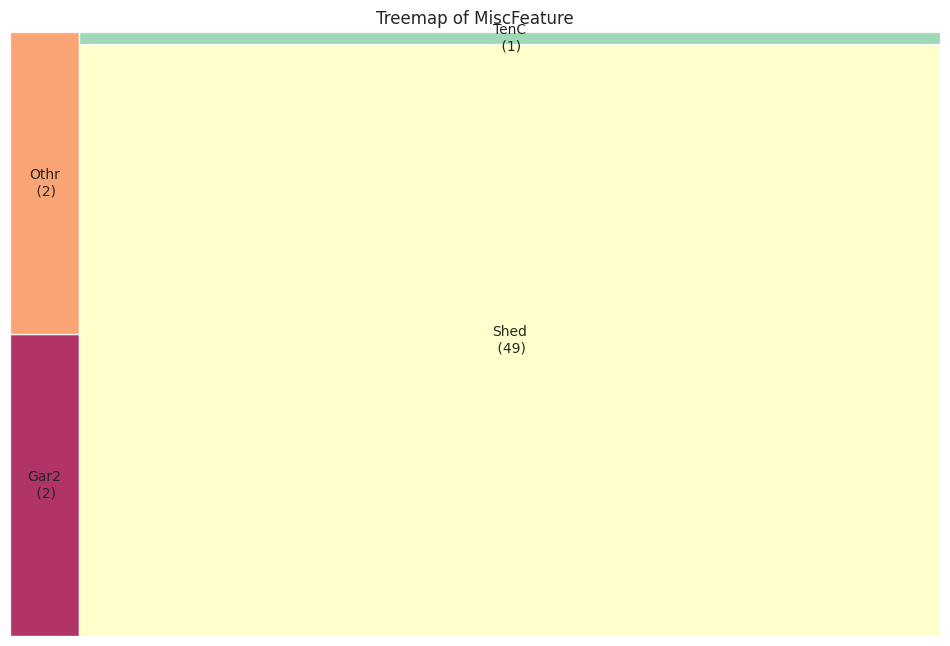

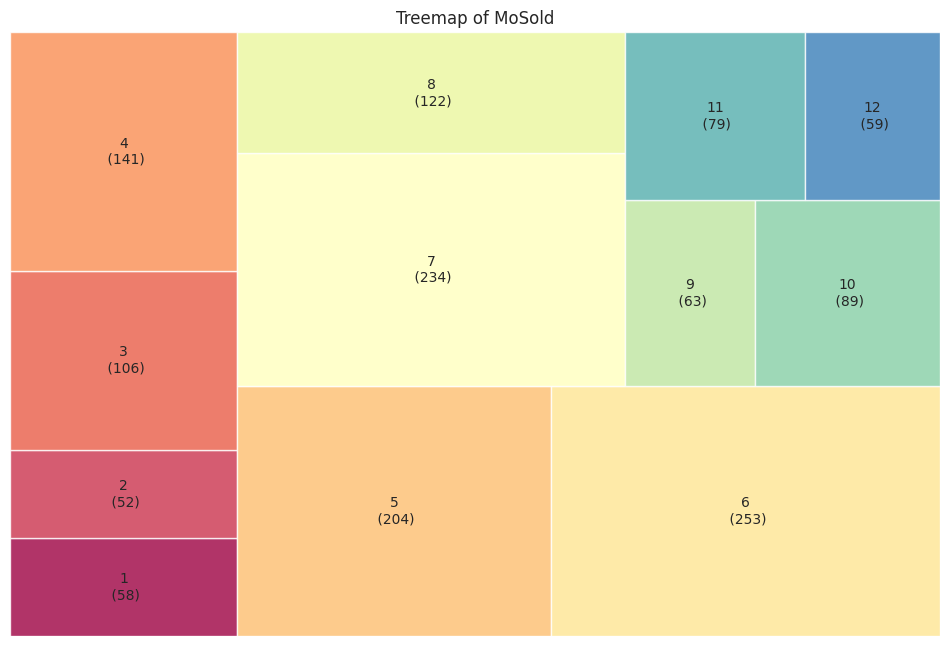

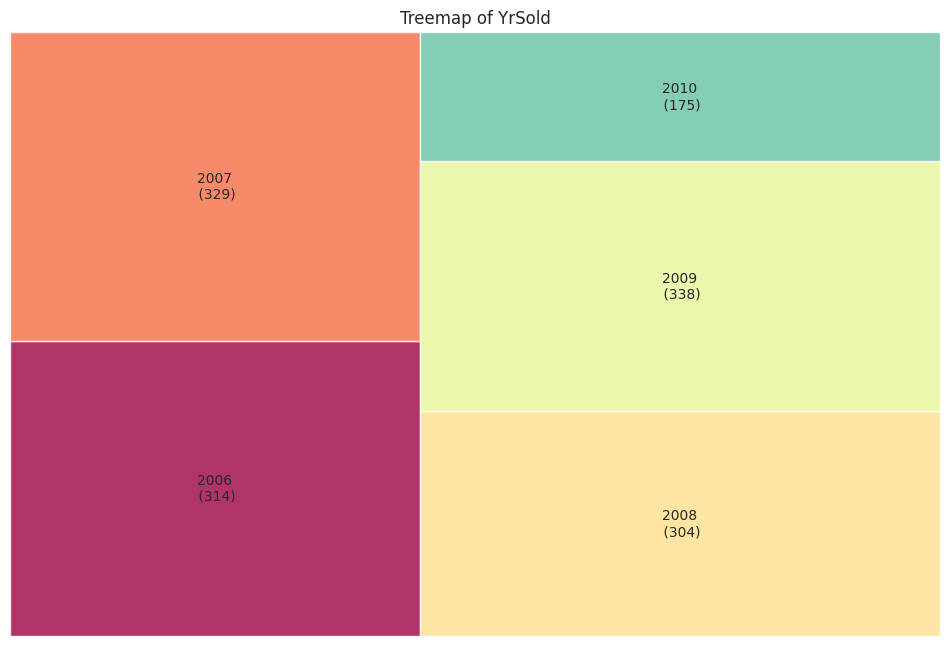

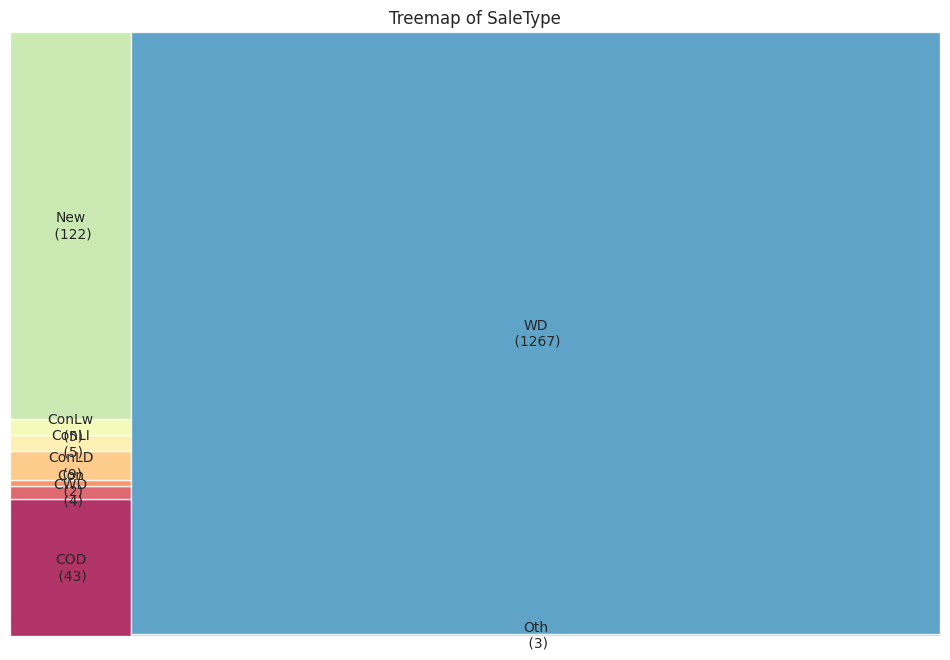

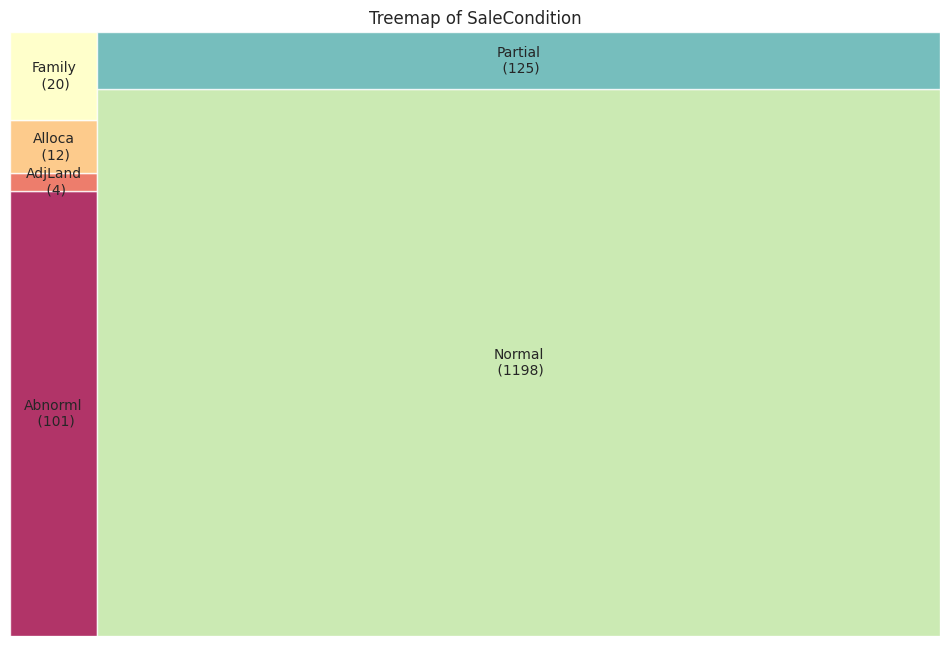

In [9]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [10]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    current_dir = %pwd
    prepare_deploy(ait_manifest, ait_sdk_name, current_dir)
